In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
from scipy.stats import norm

c:\Users\Abdullateef\miniconda3\envs\tensorflowGPU2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Define the function for each operation

In [10]:
# Write a function for the plot

def BaseRoverPos(BaseRoverData):
    # Assign column name to the unnamed column
    BaseRoverData.rename(columns={'Unnamed: 1': 'time'}, inplace= True )
    
    BaseSatTime = BaseRoverData['time']

    # The format in which the string represents a date and time
    Base_date_format = "%H:%M:%S.%f"

    Base_date_time = []
    for i in range(len(BaseSatTime)):
        # Convert the string to a datetime object
        date = datetime.strptime(BaseSatTime[i], Base_date_format)
        # Extract the time from the datetime object
        #date = date.strftime('%X')
        Base_date_time.append(date)
    
    # For CDF plot
    
    # mean = np.mean(BaseRoverData['sdne(m)'])
    # sd = np.std(BaseRoverData['sdne(m)'])
    # pdf = norm.pdf(BaseRoverData['sdne(m)'], loc = mean, scale = sd)

    return BaseRoverData, Base_date_time # ,mean, sd, pdf

In [14]:

def PlotFigure(BaseRoverData, Base_date_time, Elev):

    # Plot the Ground Plot_____________________

    plt.figure(figsize=(15,6), dpi=300)

    ax = plt.axes((0.1,0.1,0.5,0.8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.plot(BaseRoverData['longitude(deg)'], BaseRoverData['latitude(deg)'], 'c-', zorder=0, linewidth = 0.5)
    plt.plot(BaseRoverData['longitude(deg)'], BaseRoverData['latitude(deg)'], 'r.', zorder=1, markersize = 0.5)
    # plt.ylim(8.8, 8.9)
    #plt.xlim(7.7, 10)
    plt.ylabel("Latitude (deg)")
    plt.xlabel("Longitude (deg)")
    plt.title('Ground Track for the Base Rover (Elev '+ str(Elev)+')')

    plt.show()

    # Plot the Position____________________

    fig = plt.figure(figsize=(20,6), dpi=300)


    plt.subplot(3,1,1)
    plt.plot(Base_date_time, BaseRoverData['latitude(deg)'], linewidth = 1)
    plt.plot(Base_date_time, BaseRoverData['latitude(deg)'], 'r.', markersize = 2)
    plt.ylabel('Latitude (N-S)')
    plt.title('Base rover Position (Elev '+ str(Elev)+')')


    plt.subplot(3,1,2)
    plt.plot(Base_date_time, BaseRoverData['longitude(deg)'], linewidth = 1)
    plt.plot(Base_date_time, BaseRoverData['longitude(deg)'], 'm.', markersize = 2)
    plt.ylabel('Longitude (E-W)')

    plt.subplot(3,1,3)
    plt.plot(Base_date_time, BaseRoverData['height(m)'], linewidth = 1)
    plt.plot(Base_date_time, BaseRoverData['height(m)'], 'g.', markersize = 2)
    plt.ylabel('Height (U-D)')
    plt.xlabel('Time')

    # Plot the time every 2 minutes on the X-axis
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
    # Plot the X-axis data label in a 90 degree angle
    plt.xticks(rotation=90)


    plt.show()

    # Plot the SDNE plot___________________

    plt.figure(figsize=(15,4), dpi=300)
    #plt.style.use('_mpl-gallery')

    ax = plt.axes((0.1,0.1,0.5,0.8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.hist(BaseRoverData['sdne(m)'], edgecolor='black')
    #plt.plot(RoverData['sdne(m)'], pdf, color = 'red')

    plt.xlabel('SDNE(m)')
    plt.ylabel('Probability Density')
    plt.title('Base Rover SDNE Broadcast Plot (Elev '+ str(Elev)+')')

    plt.show()

In [4]:
def CDF_plot(CDF_DOP0, CDF_DOP15, CDF_DOP20, CDF_DOP30, DOP_Type):
    
    sortedCDF_DOP0 = np.sort(CDF_DOP0)
    yvals_DOP0 = np.arange(len(sortedCDF_DOP0))/ float(len(sortedCDF_DOP0))

    sortedCDF_DOP15 = np.sort(CDF_DOP15)
    yvals_DOP15 = np.arange(len(sortedCDF_DOP15))/ float(len(sortedCDF_DOP15))

    sortedCDF_DOP20 = np.sort(CDF_DOP20)
    yvals_DOP20 = np.arange(len(sortedCDF_DOP20))/ float(len(sortedCDF_DOP20))

    sortedCDF_DOP30 = np.sort(CDF_DOP30)
    yvals_DOP30 = np.arange(len(sortedCDF_DOP30))/ float(len(sortedCDF_DOP30))

    # plot CDF
    plt.figure(figsize=(15,4), dpi=300)

    ax = plt.axes((0.1,0.1,0.5,0.8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.plot(sortedCDF_DOP0, yvals_DOP0, 'r--', label = '0deg Elevation')
    plt.plot(sortedCDF_DOP15, yvals_DOP15, 'c-.', label = '15deg Elevation')
    plt.plot(sortedCDF_DOP20, yvals_DOP20, 'y-.', label = '20deg Elevation')
    plt.plot(sortedCDF_DOP30, yvals_DOP30, 'm-.', label = '30deg Elevation')

    plt.xlabel(DOP_Type)
    plt.ylabel('Cumulative Probability')
    plt.title('GNSS Position Data CDF (' + DOP_Type + ')')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [5]:
def SkyPlot(GpsRoverFile, GloRoverFile, GalRoverFile):
    
    GpsAz = np.radians(GpsRoverFile['AZ(deg)'])
    GpsEl = GpsRoverFile['EL(deg)']
    times = GpsRoverFile['% TIME (GPST)']

    GloAz = np.radians(GloRoverFile['AZ(deg)'])
    GloEl = GloRoverFile['EL(deg)']

    GalAz = np.radians(GalRoverFile['AZ(deg)'])
    GalEl = GalRoverFile['EL(deg)']

    # Plot sky plot
    fig = plt.figure(figsize=(8,8), dpi=60)

    # Coordinate system to polar coordinate
    ax = fig.add_subplot(111, projection='polar')

    # Angle 0 starts from the North
    ax.set_theta_zero_location('N')

    # Change direction to clockwise
    ax.set_theta_direction(-1)
    ax.set_ylim(90, 0)
    # Increase yticks by 15
    ax.set_yticks(range(0, 90, 15))
    # Set the position of the label to 0 
    ax.set_rlabel_position(0)

    plt.scatter(GpsAz, GpsEl, s=5, c='g', marker='o', label='GPS')
    plt.scatter(GloAz, GloEl, s=5, c='r', marker='o', label='GLO')
    plt.scatter(GalAz, GalEl, s=5, c='m', marker='o', label='GAL')
    plt.legend(loc='best')
    ax.grid(True)
    plt.show()

In [6]:
def SatDOP(SatDopFile, GpsSatDopFile, GalSatDopFile, GloSatDopFile, BdsSatDopFile):
    # Extract time column
    SatTime = SatDopFile['% TIME (GPST)']

    # The format in which the string represents a date and time
    date_format = "%Y/%m/%d %H:%M:%S.%f"

    date_time = []
    for i in range(len(SatTime)):
        # Convert the string to a datetime object
        date = datetime.strptime(SatTime[i], date_format)
        # Extract the time from the datetime object
        #date = date.strftime('%X')
        date_time.append(date)

    NumOfSat = SatDopFile['NSAT']
    GpsNumOfSat = GpsSatDopFile['NSAT']
    GloNumOfSat = GloSatDopFile['NSAT']
    BdsNumOfSat = BdsSatDopFile['NSAT']
    GalNumOfSat = GalSatDopFile['NSAT']

    fig = plt.figure(figsize=(20,6), dpi=300)

    ax = plt.axes((0.1,0.1,0.5,0.8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    plt.plot(date_time, NumOfSat, 'm:', label='Total Visible Sat' )

    plt.title('Number of Satellites')
    plt.xlabel('Time(m-s)')
    plt.ylabel('Number of Satellites')
    plt.legend(loc='best')

    # Plot the time every 2 minutes on the X-axis
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
    # Plot the X-axis data label in a 90 degree angle
    plt.xticks(rotation=90)
    plt.show()

    fig = plt.figure(figsize=(20,6), dpi=300)

    ax = plt.axes((0.1,0.1,0.5,0.8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    plt.plot(date_time, GpsNumOfSat, 'k-', label='GPS' )
    plt.plot(date_time, GloNumOfSat, 'r-.', label='GLO' )
    plt.plot(date_time, BdsNumOfSat, 'g:.', label='BDS' )
    plt.plot(date_time, GalNumOfSat, 'b:.', label='GAL' )

    plt.title('Number of Satellites')
    plt.xlabel('Time(m-s)')
    plt.ylabel('Satellite Number')
    plt.legend(loc='best')
    # Plot the time every 2 minutes on the X-axis
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
    # Plot the X-axis data label in a 90 degree angle
    plt.xticks(rotation=90)
    plt.show()

    AllGDOP = SatDopFile['GDOP']
    AllPDOP = SatDopFile['PDOP']
    AllHDOP = SatDopFile['HDOP']
    AllVDOP = SatDopFile['VDOP']

    fig = plt.figure(figsize=(20,6), dpi=300)

    ax = plt.axes((0.1,0.1,0.5,0.8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    plt.plot(date_time, AllGDOP, 'k-', label='Total GDOP' )
    plt.plot(date_time, AllHDOP, 'm-.', label='Total HDOP' )
    plt.plot(date_time, AllVDOP, 'r-.', label='Total VDOP' )
    plt.plot(date_time, AllPDOP, 'g:', label='Total PDOP' )

    plt.title('Dillusion of Precision')
    plt.xlabel('Time(m-s)')
    plt.ylabel('DOP (EL >= 0)')
    plt.legend(loc='best')
    # Plot the time every 2 minutes on the X-axis
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
    # Plot the X-axis data label in a 90 degree angle
    plt.xticks(rotation=90)
    plt.show()


### Sky Plot

In [7]:
GpsRoverFile = pd.read_fwf('Data/SNR_EL_MP_0degGPS_rover29_5.txt')

GloRoverFile = pd.read_fwf('Data/SNR_EL_MP_0degGLO_rover29_5.txt')
GloRoverFile.head()

GalRoverFile = pd.read_fwf('Data/SNR_EL_MP_0degEGN_rover29_5.txt')

# BDSRoverFile = pd.read_fwf('Data/SNR_EL_MP_0degBDS_rover29_5.txt') # Unable to export BDS data

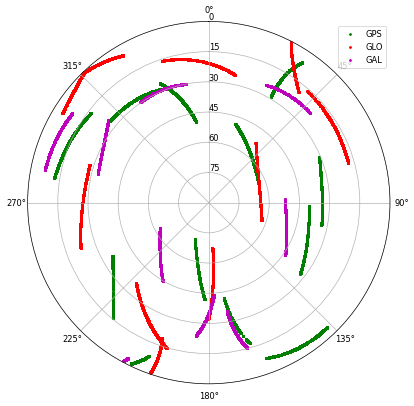

In [8]:
SkyPlot(GpsRoverFile, GloRoverFile, GalRoverFile)

### Base/Rover Position

In [29]:
BaseRoverData_Elev2 = pd.read_fwf("Data\Base_roverStaticObs0529_30Elev.pos", skiprows = 24)
BaseRoverData, Base_date_time = BaseRoverPos(BaseRoverData_Elev2)

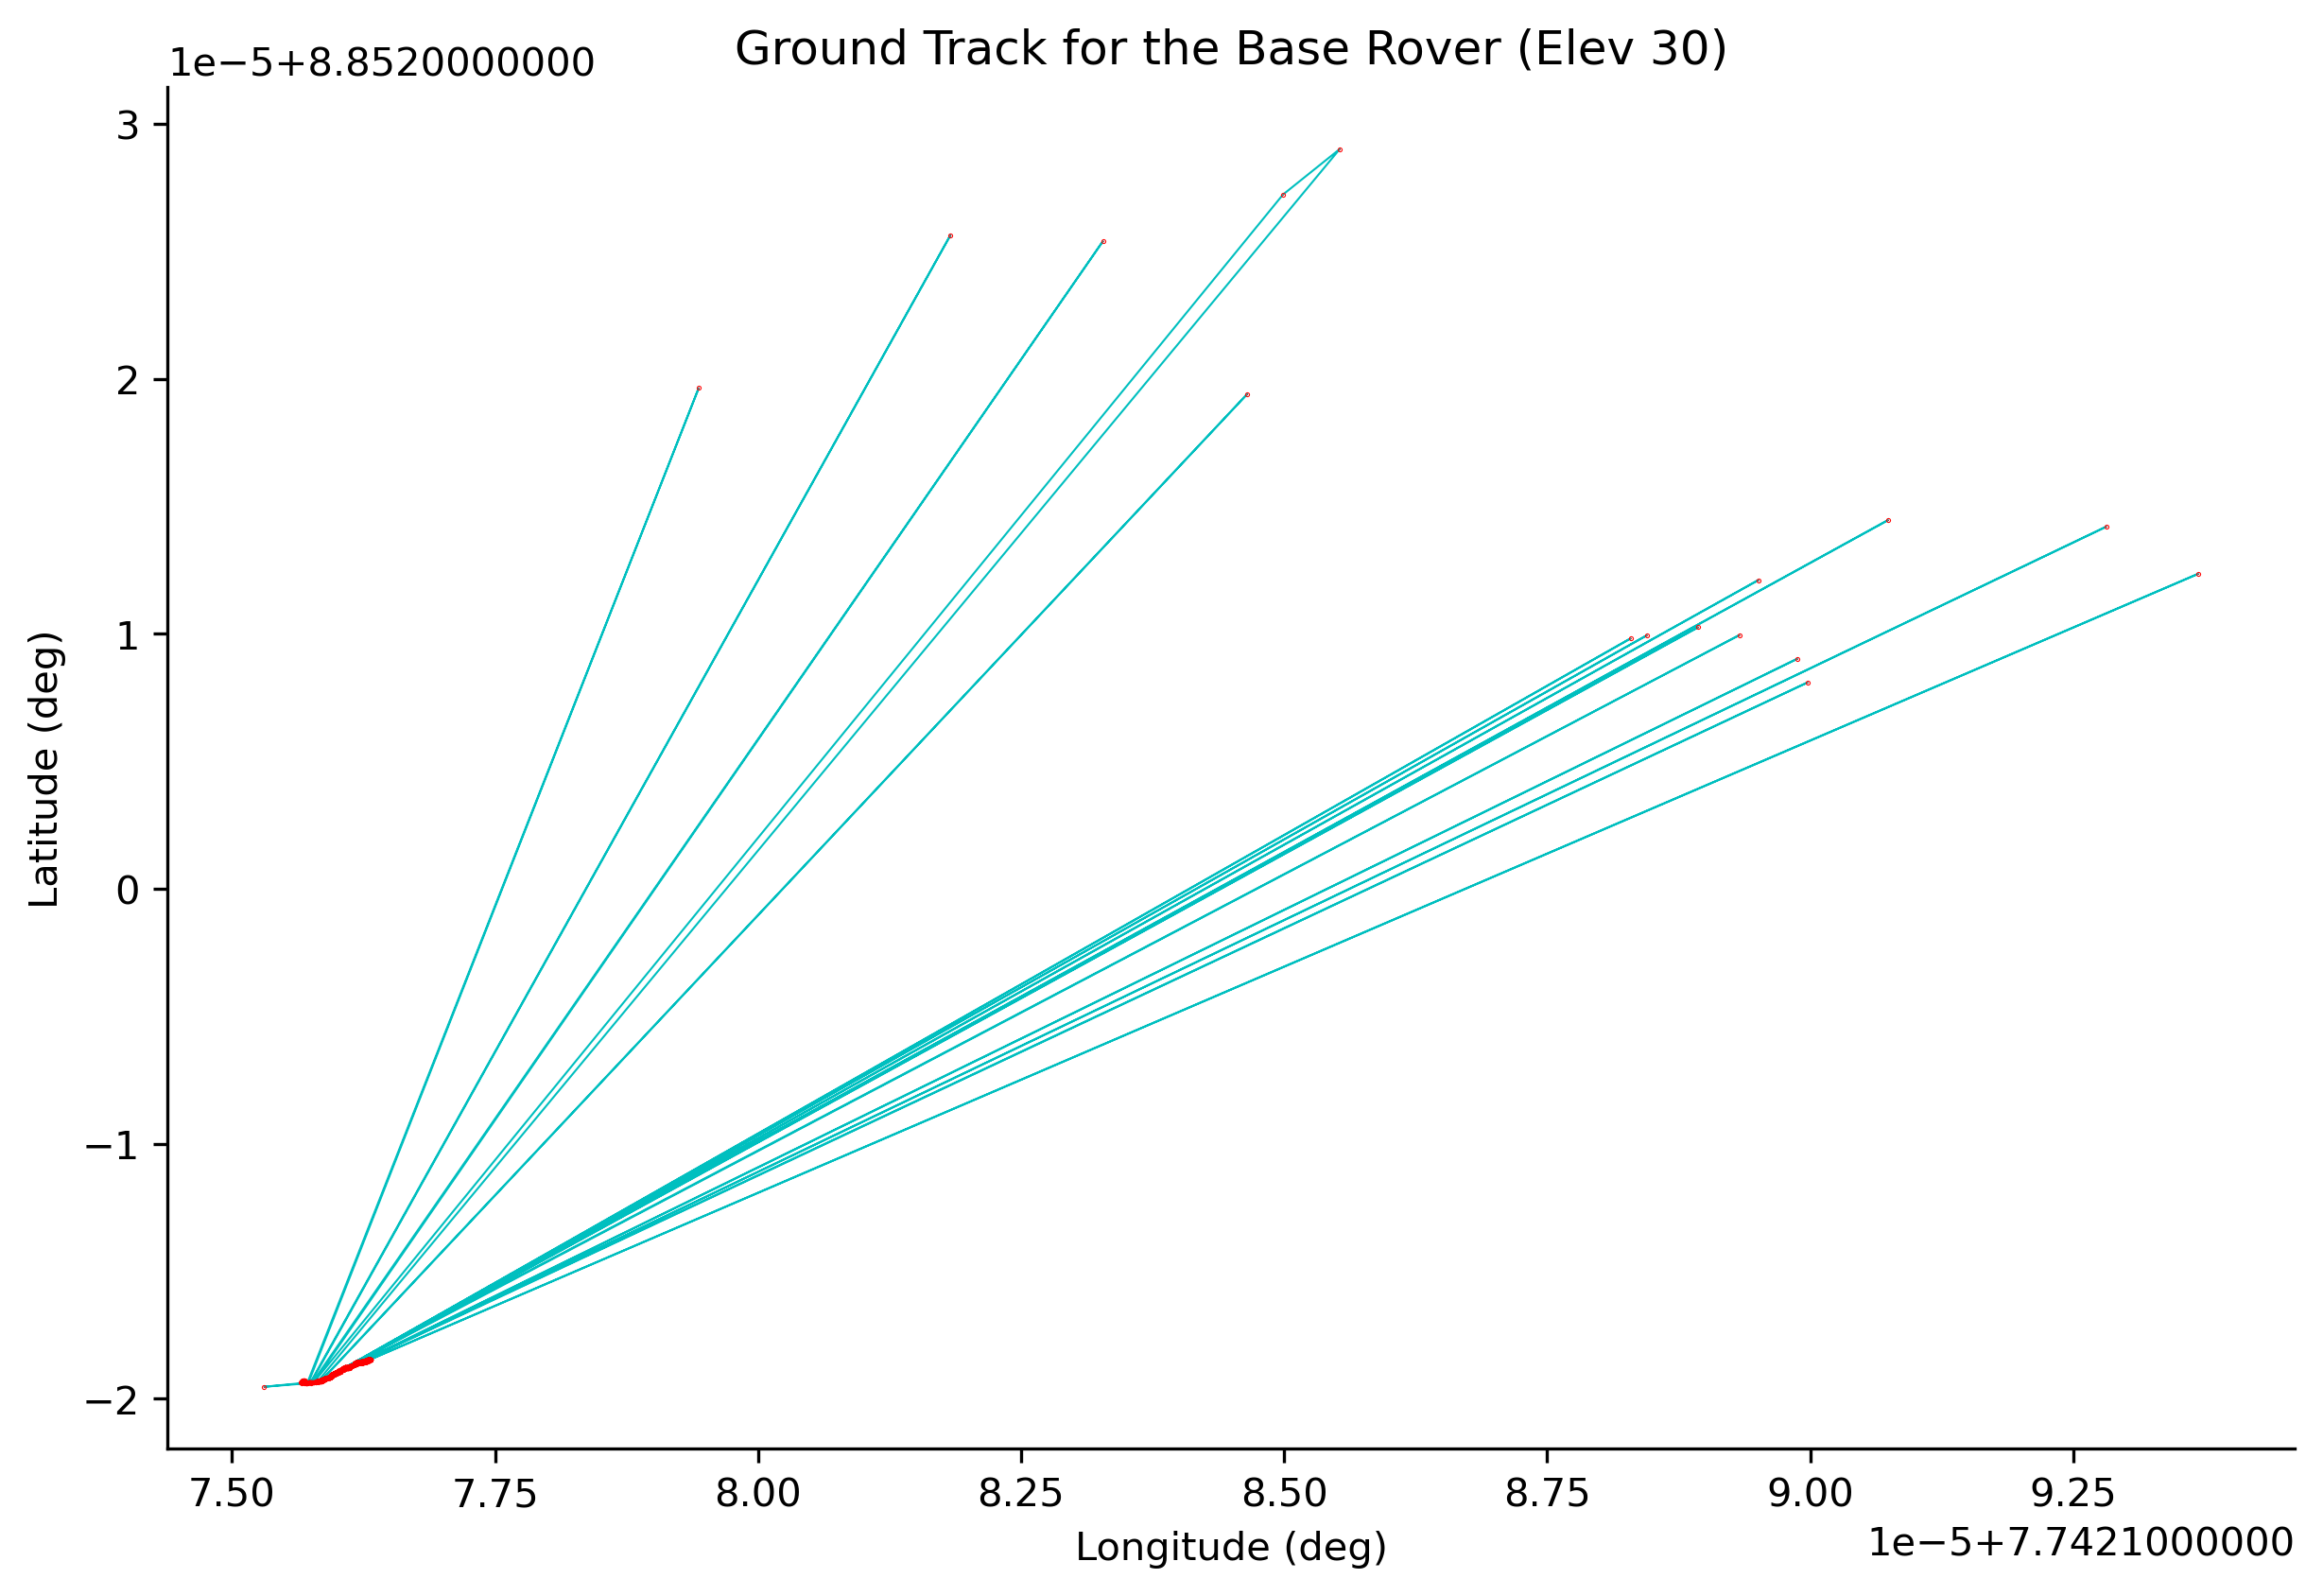

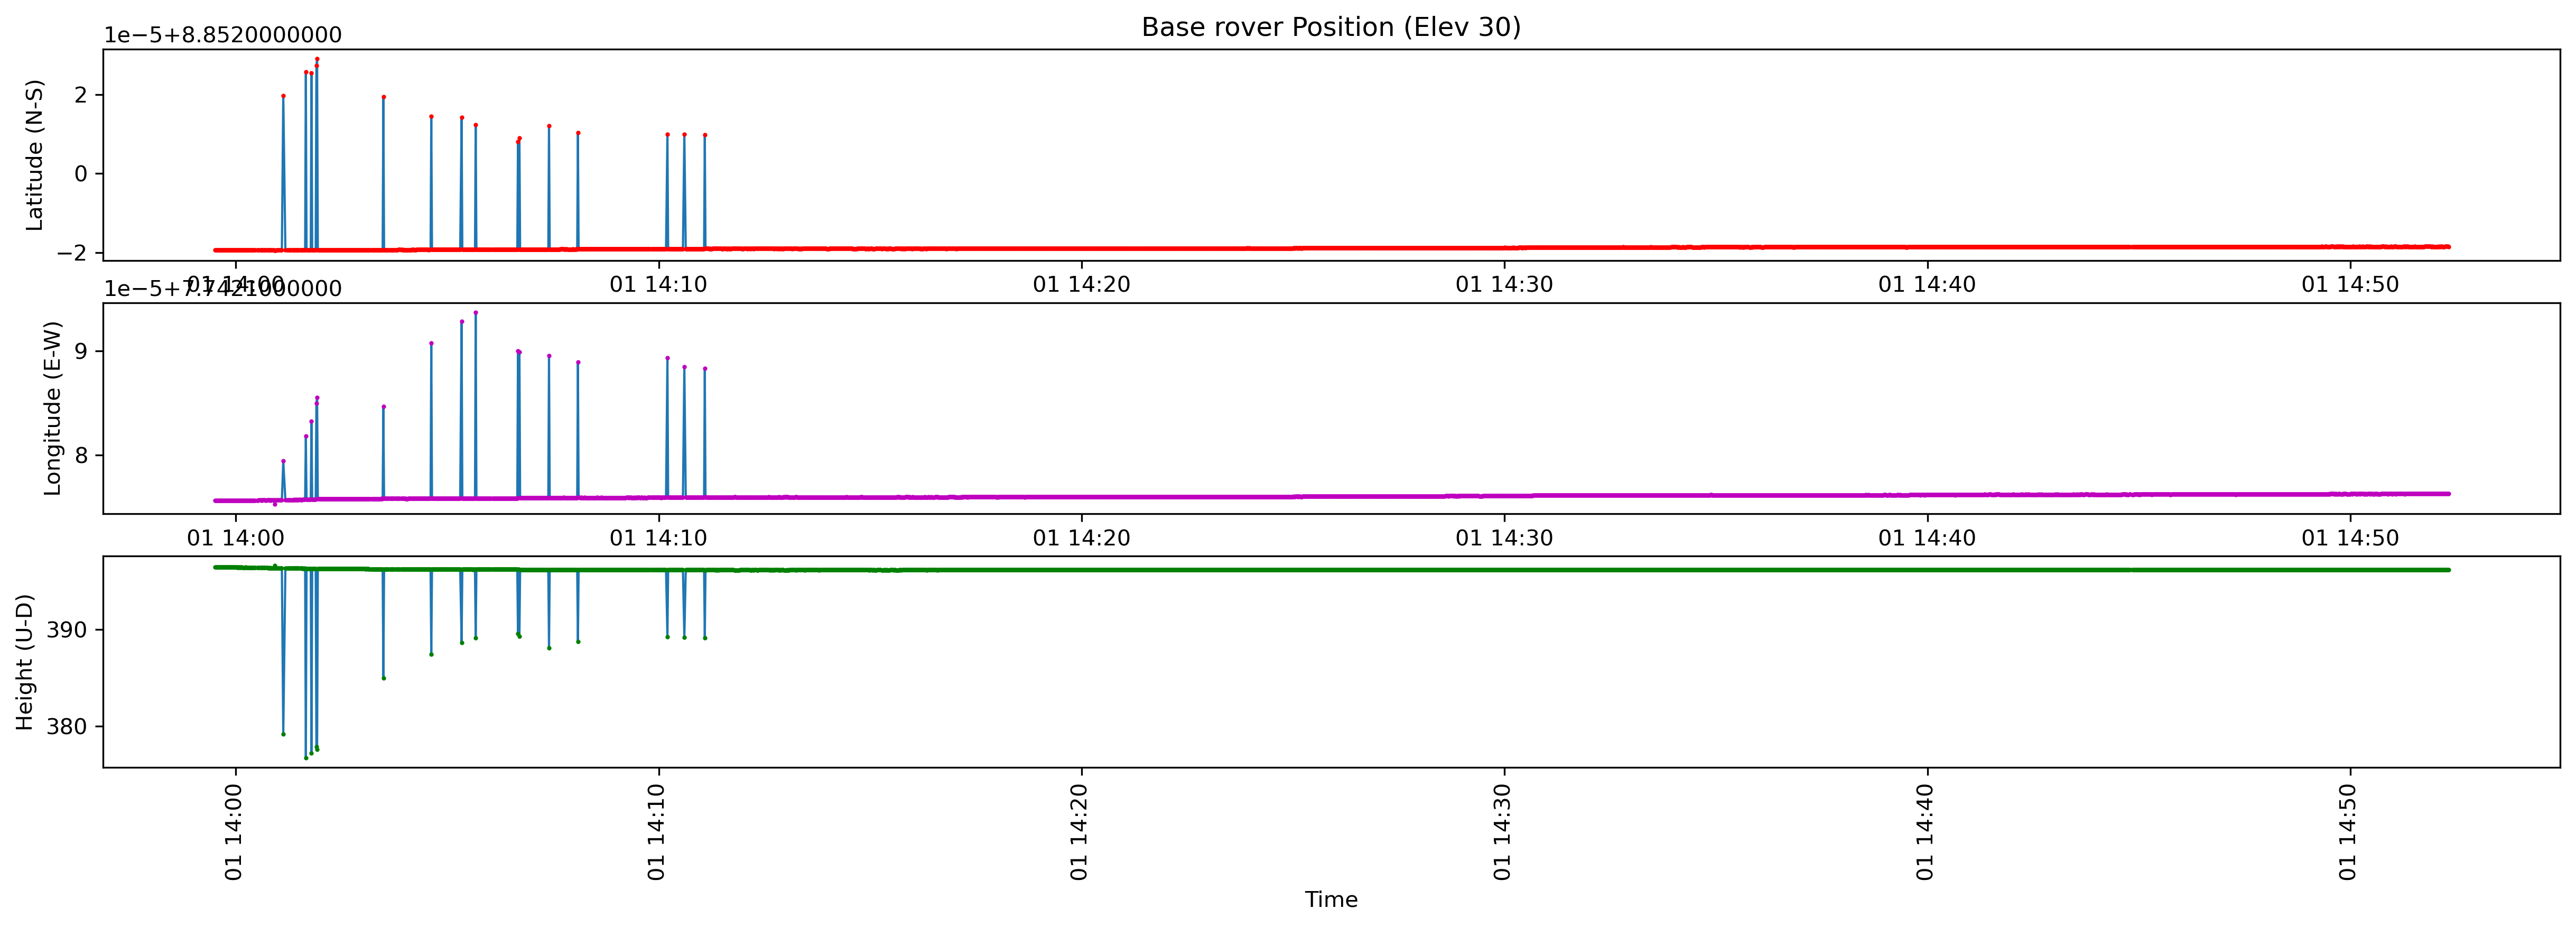

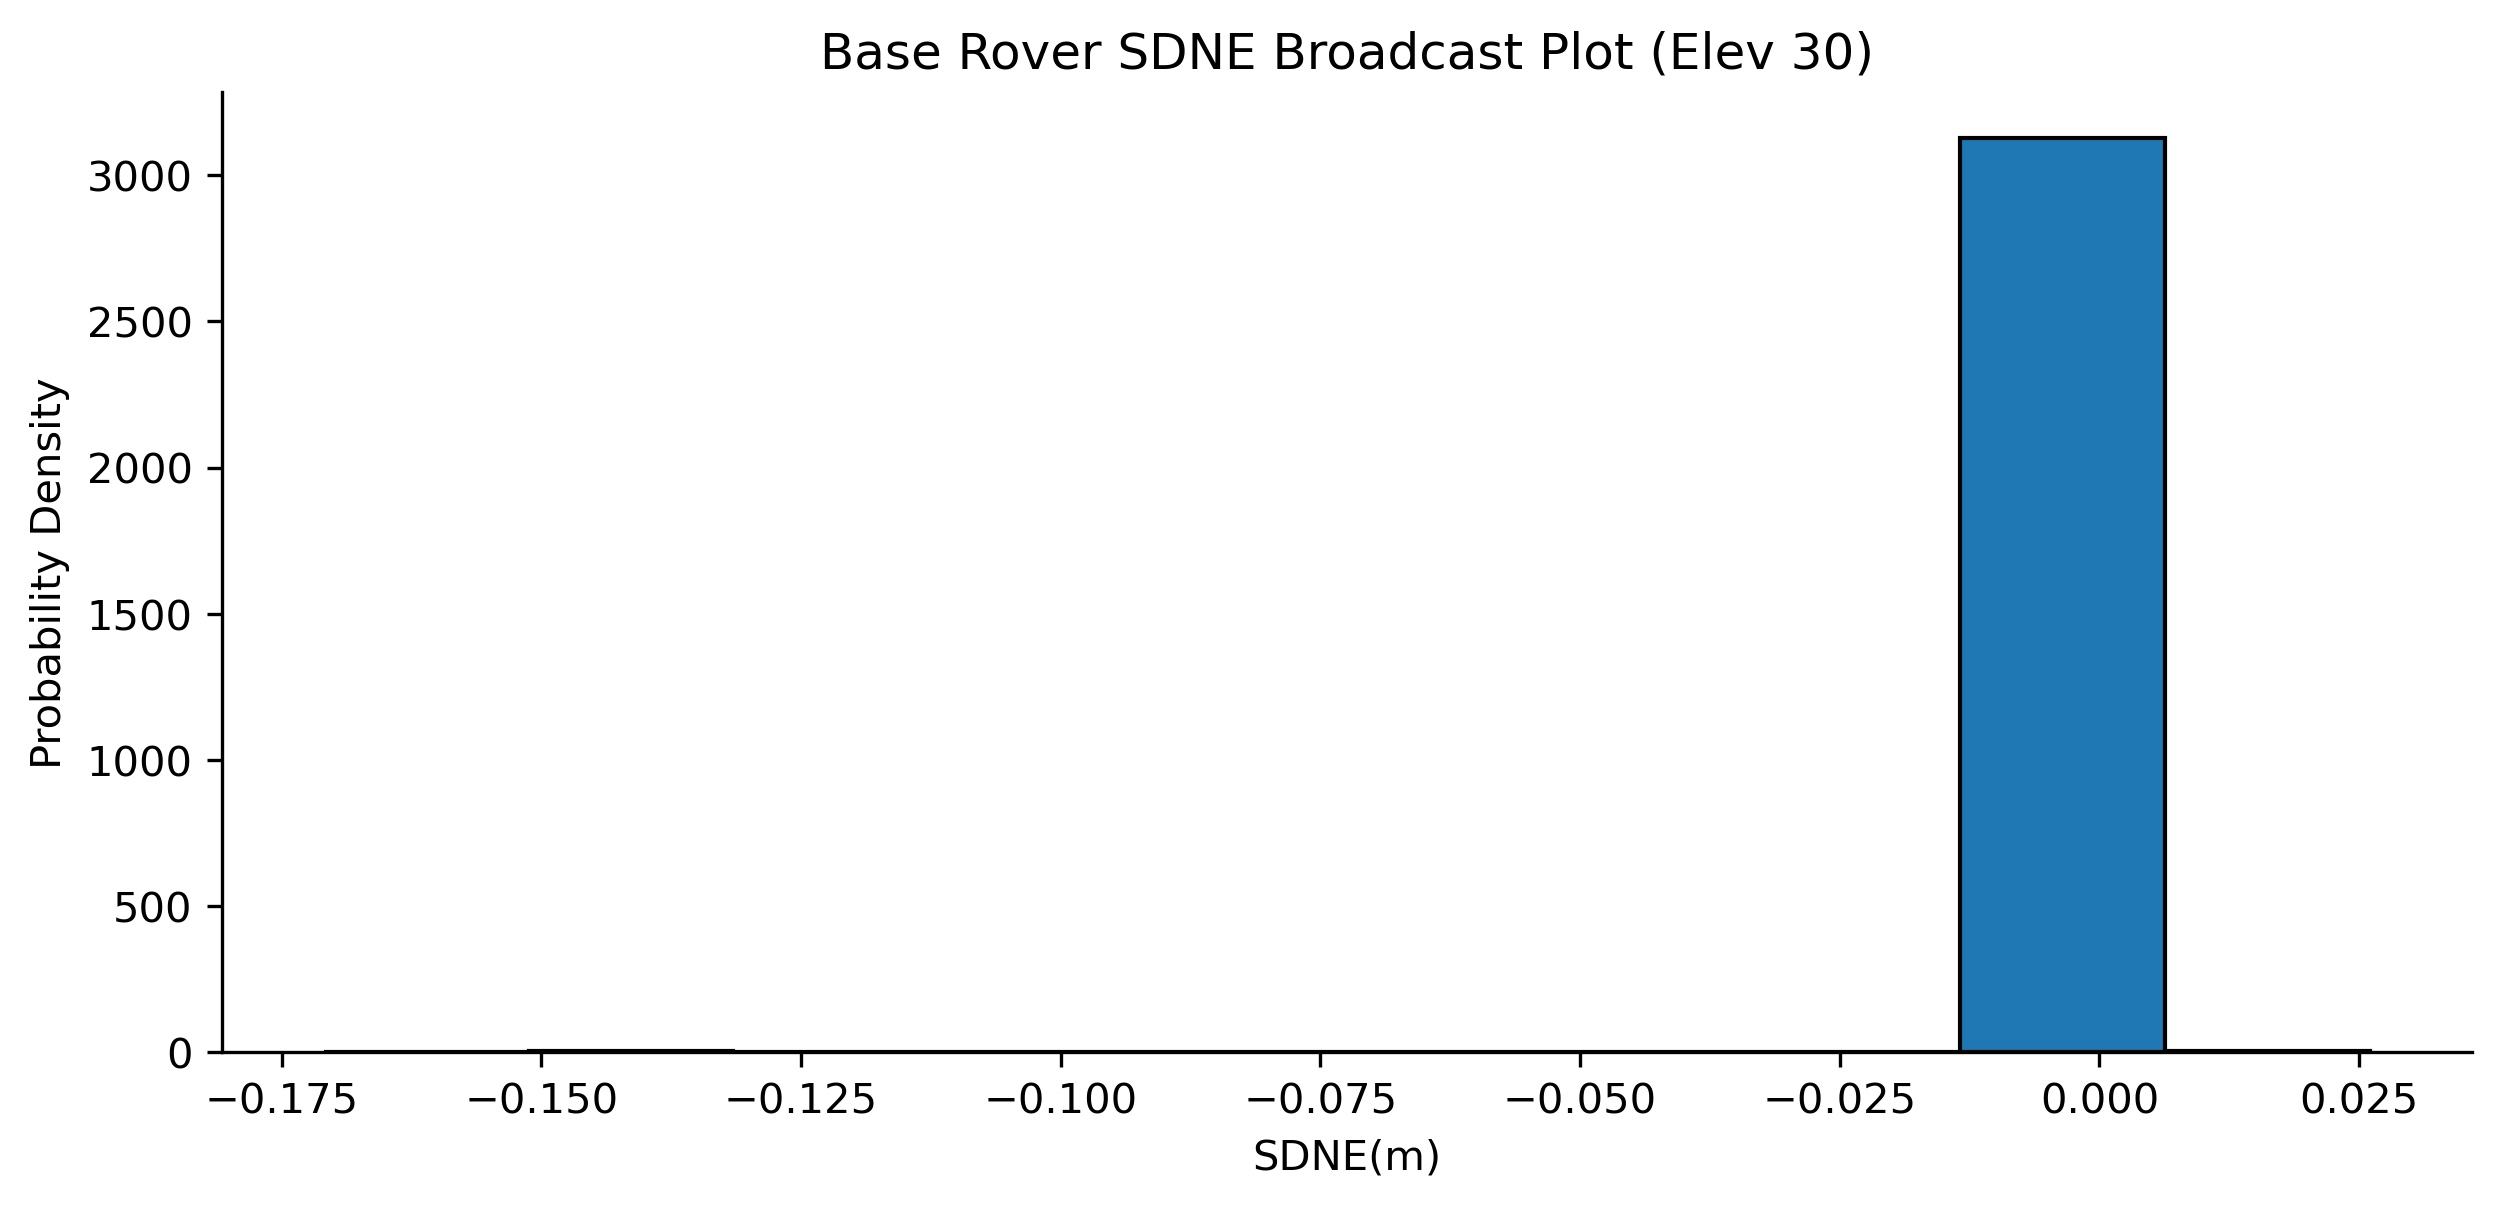

In [30]:
Elev = 30
PlotFigure(BaseRoverData, Base_date_time, Elev)

### Rover Position

In [17]:
# Rover data with 30 deg Elavation angle
RoverData_Elev30 = pd.read_fwf("Data/roverStaticObs0529_30Elev.pos", skiprows = 13)
BaseRoverData, Base_date_time = BaseRoverPos(RoverData_Elev30)

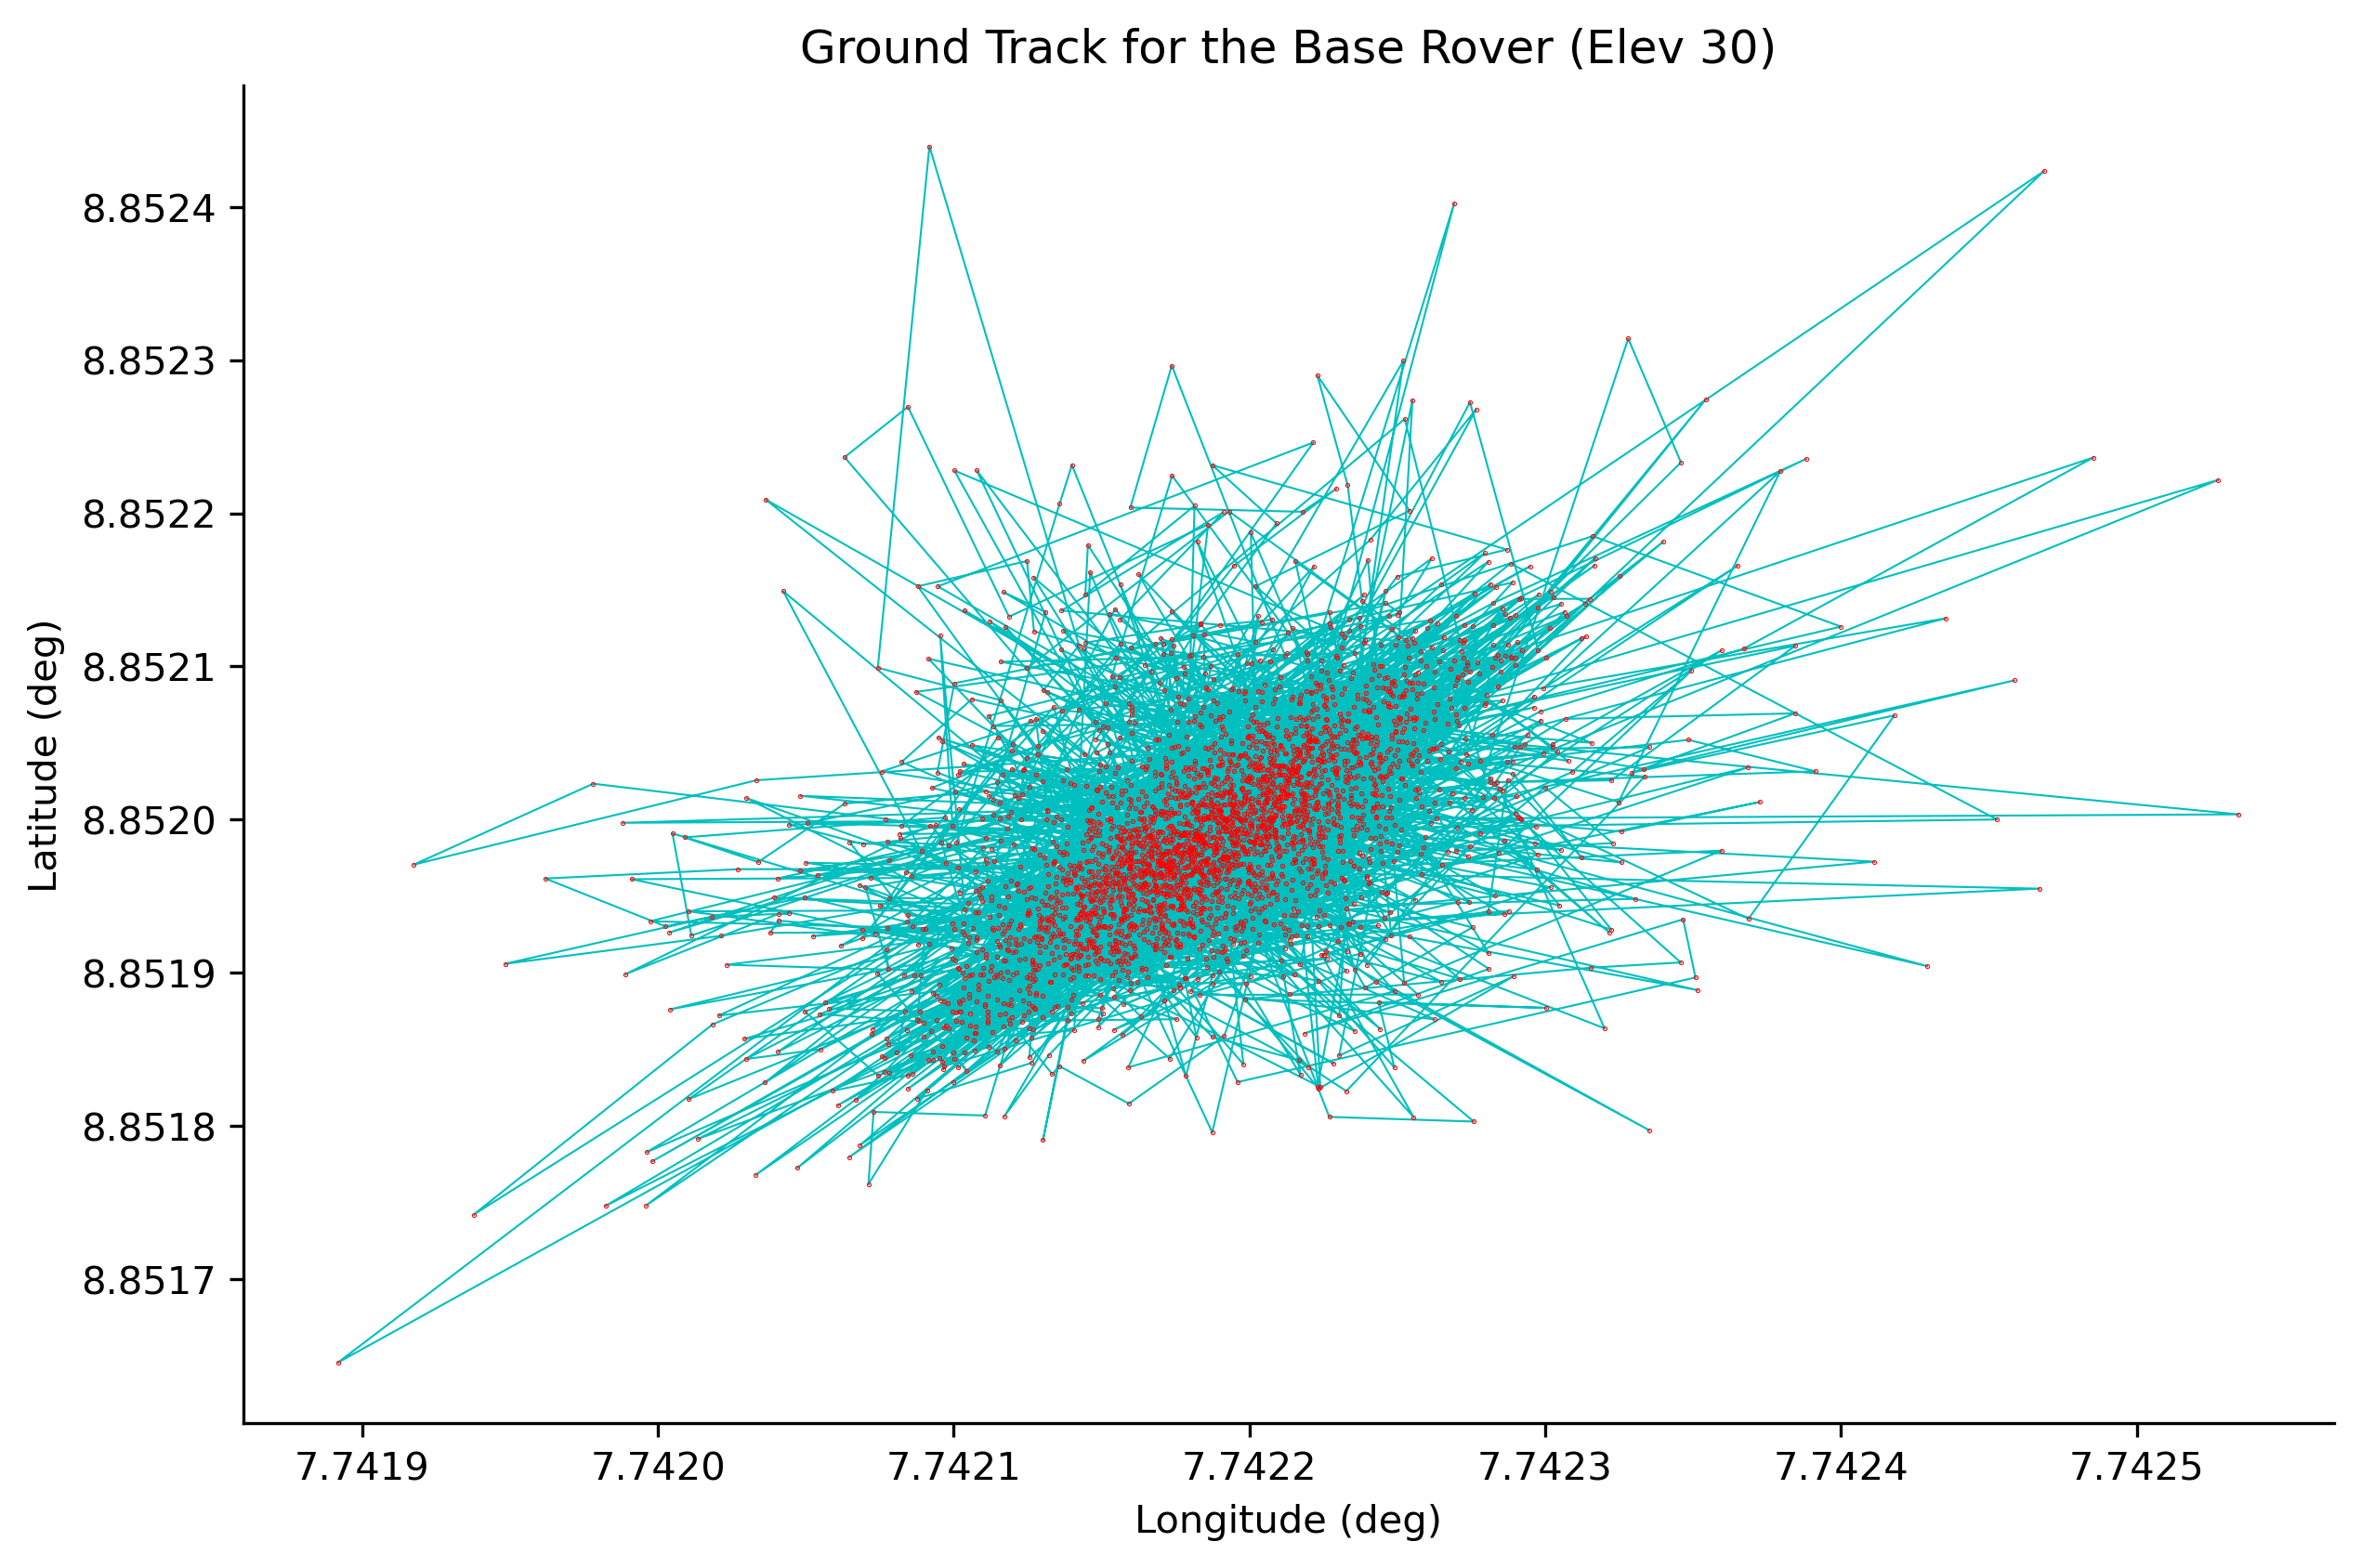

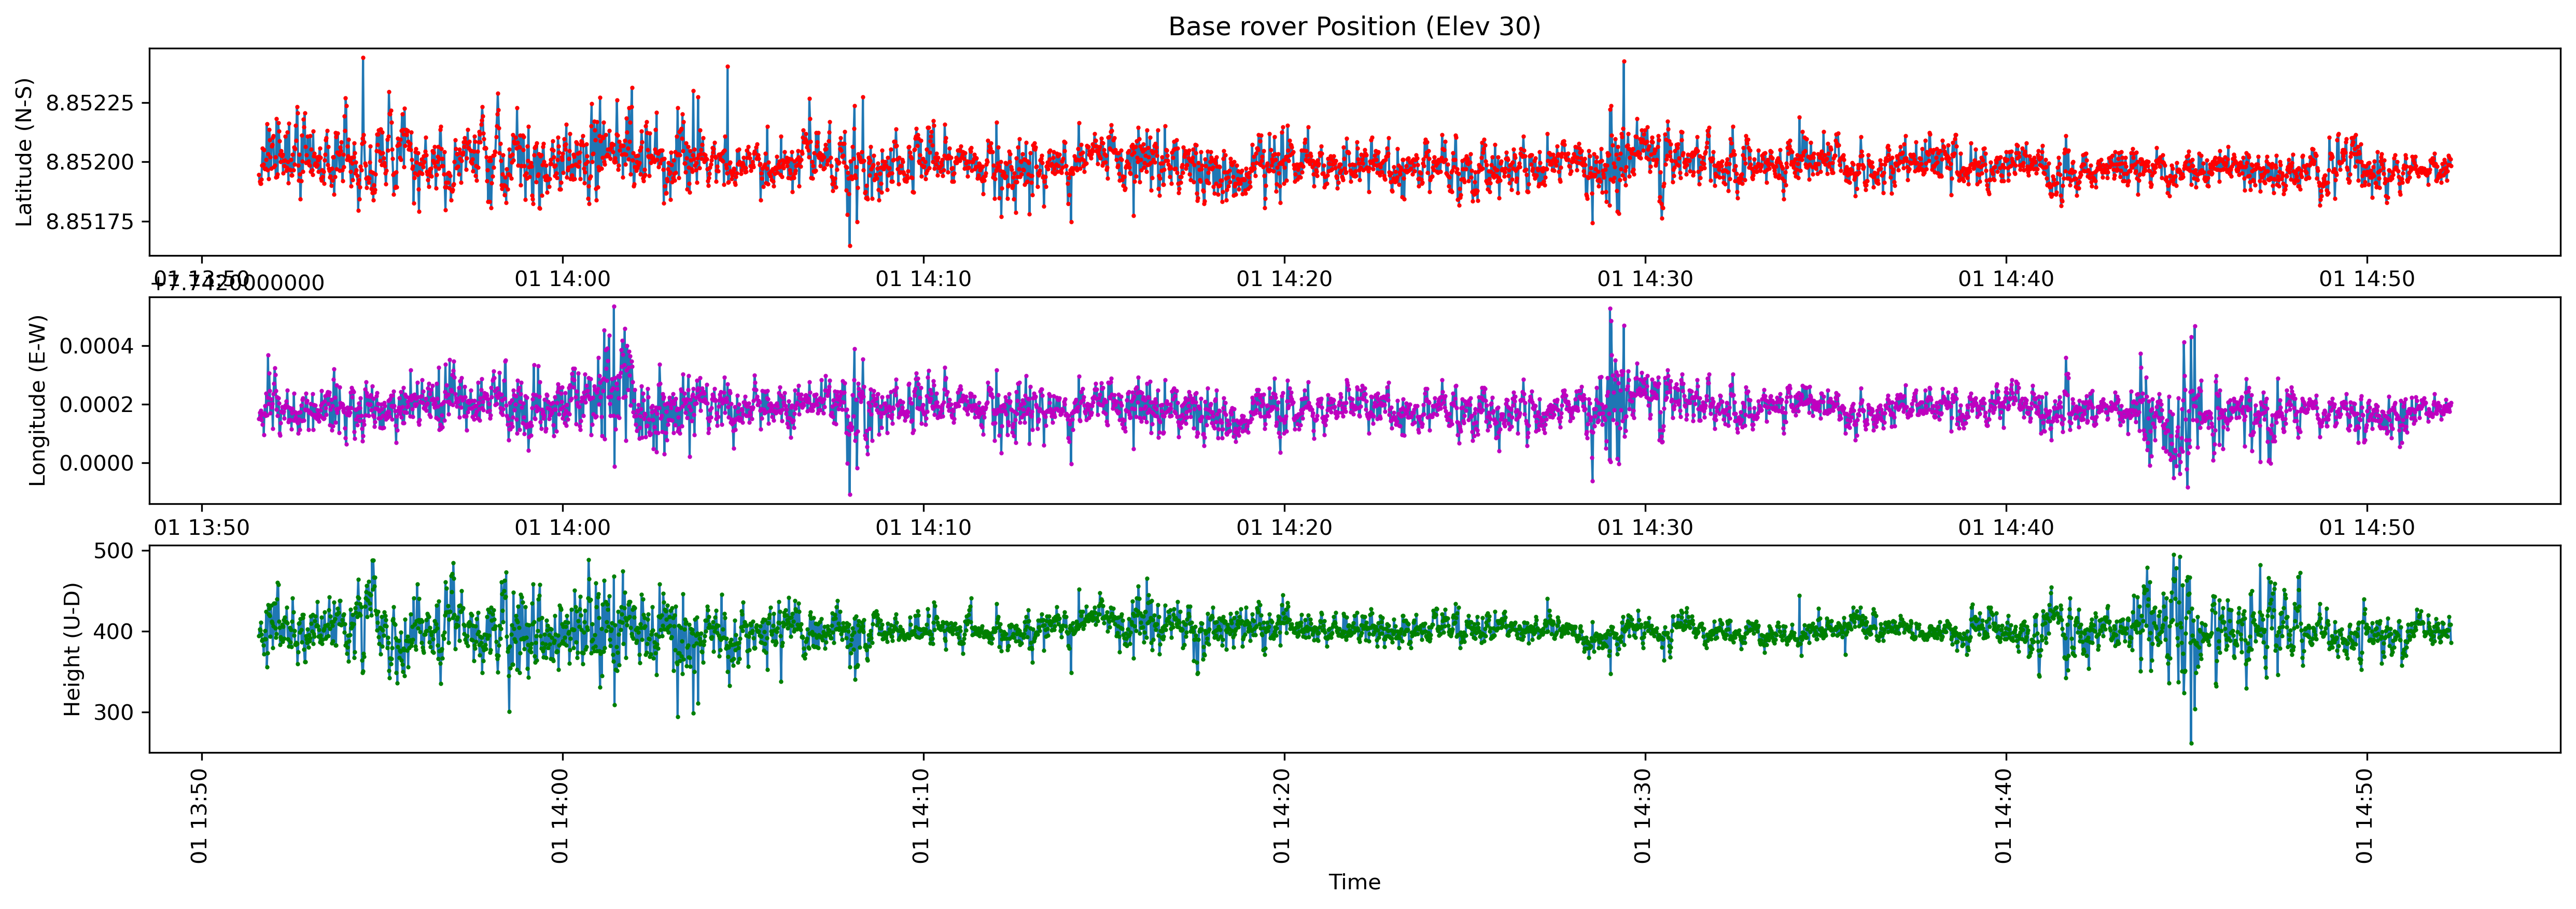

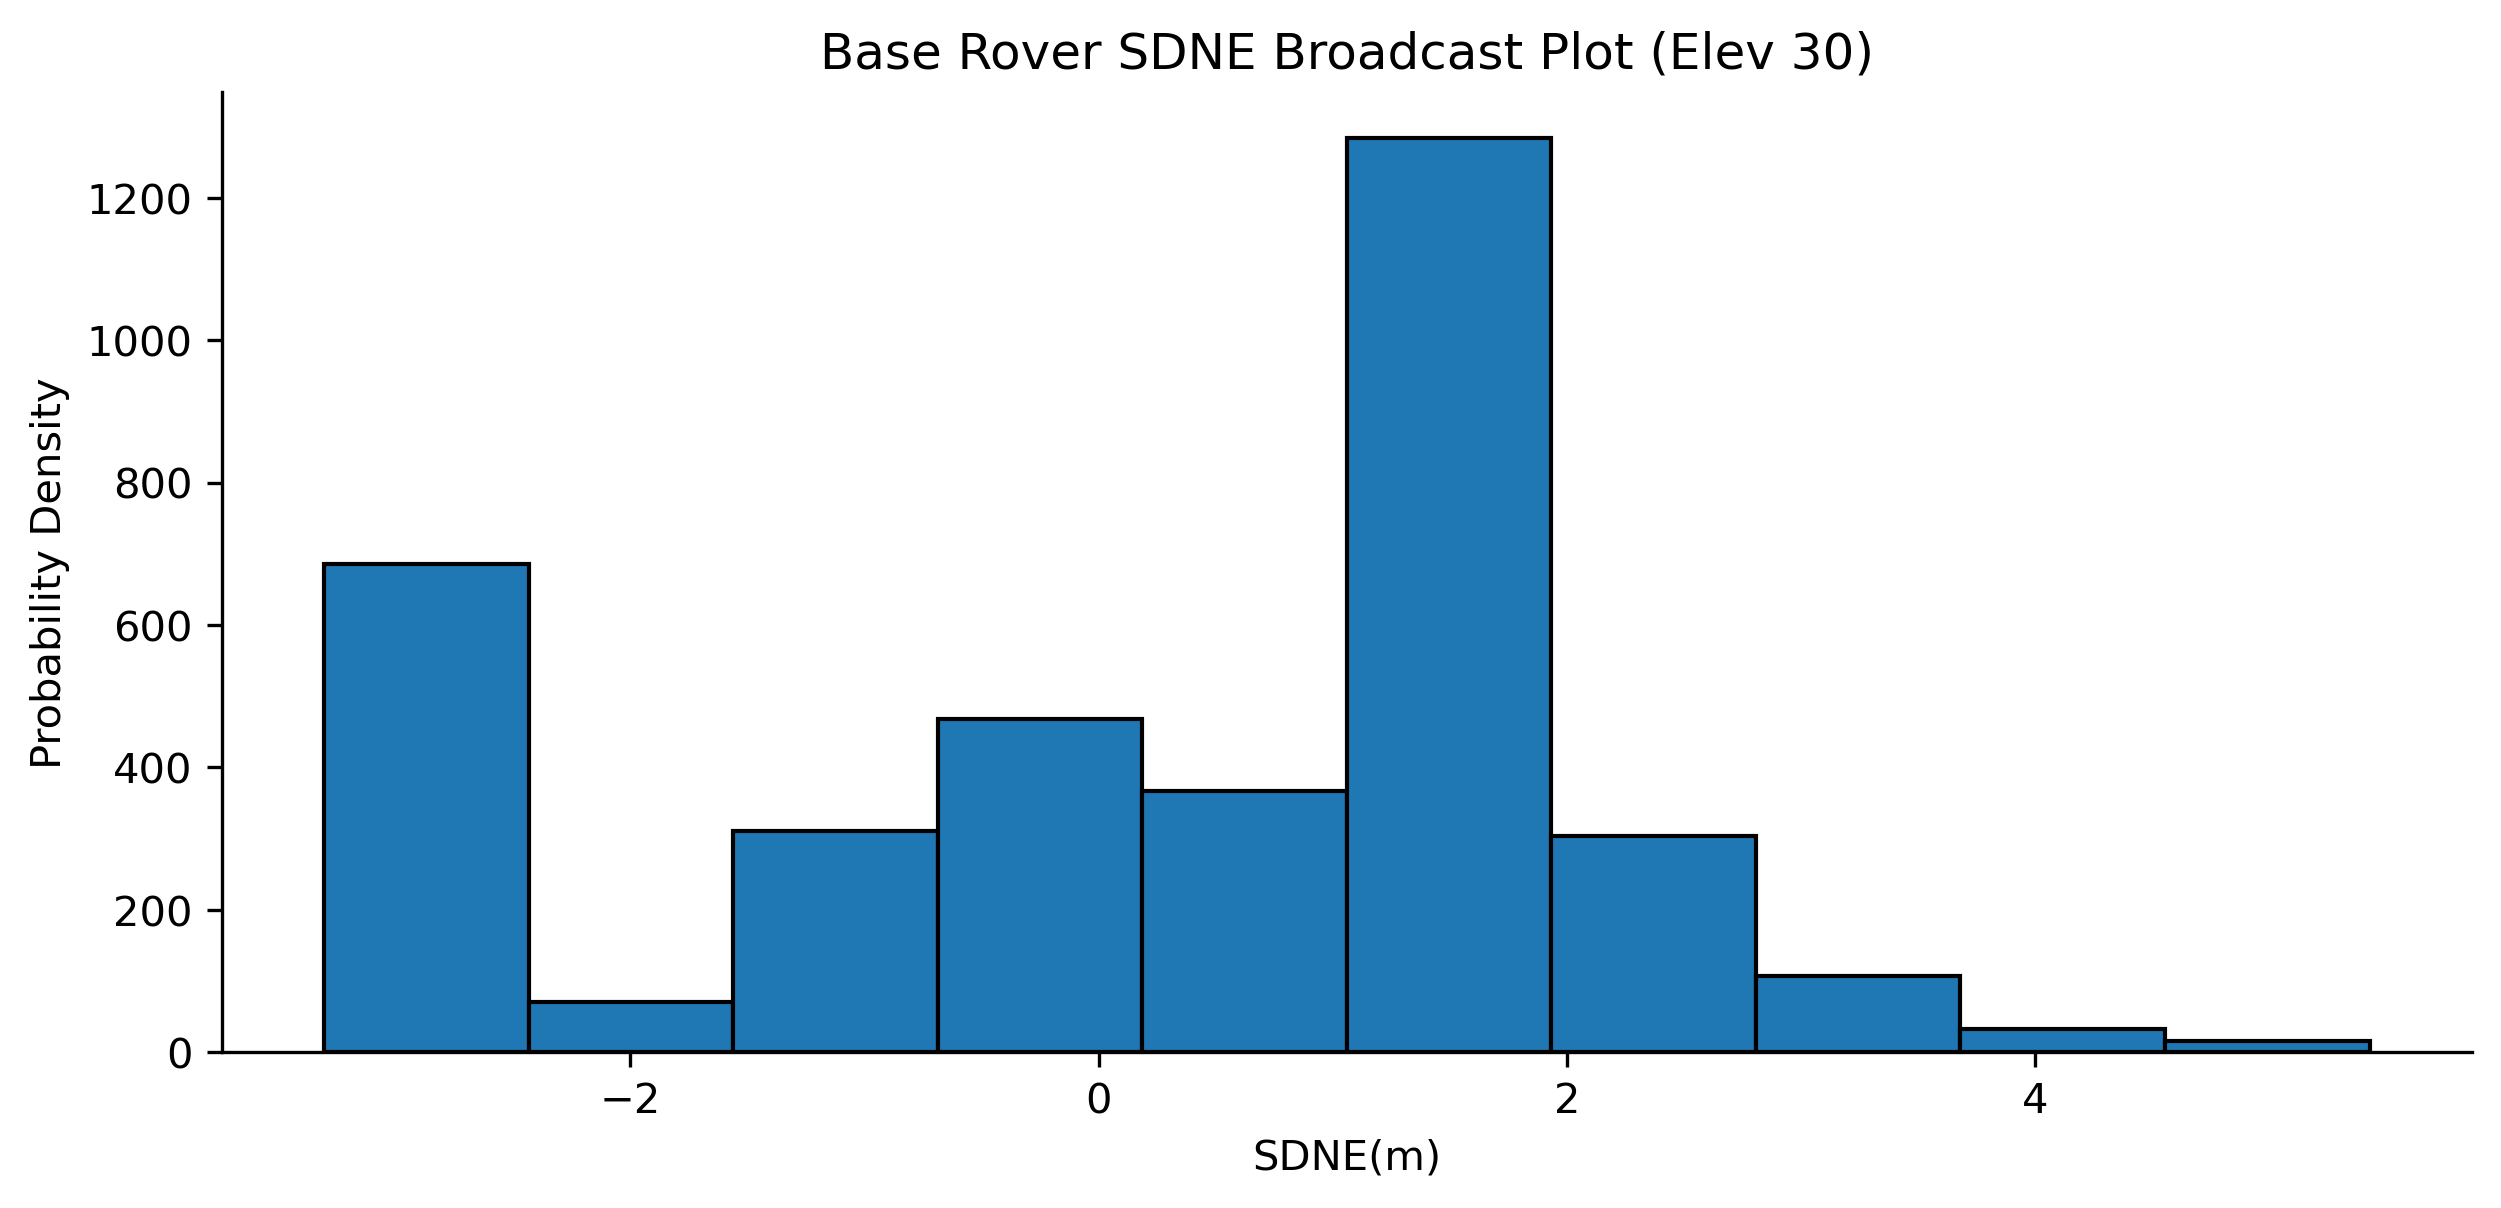

In [18]:
Elev = 30
PlotFigure(BaseRoverData, Base_date_time, Elev)

### For CDF Plot (Rover Single Positioning)

In [19]:
# Import Satellite and DOP file for each constellation (0 deg Elev)
SatDopFile0 = pd.read_fwf('Data/Sats_Dop_ALL29_5.txt')
GpsSatDopFile0 = pd.read_fwf('Data/Sats_Dop_GPS29_5.txt')
GloSatDopFile0 = pd.read_fwf('Data/Sats_Dop_GLO29_5.txt')
BdsSatDopFile0 = pd.read_fwf('Data/Sats_Dop_BDS29_5.txt')
GalSatDopFile0 = pd.read_fwf('Data/Sats_Dop_GAL29_5.txt')

# Import Satellite and DOP file for each constellation (15 deg Elev)
SatDopFile15 = pd.read_fwf('Data/RoverSats_Dop_ALL29_5_15Elev.txt')
# GpsSatDopFile15 = pd.read_fwf('Data/RoverSats_Dop_GPS29_5_15Elev.txt')
# GloSatDopFile15 = pd.read_fwf('Data/RoverSats_Dop_GLO29_5_15Elev.txt')
# BdsSatDopFile15 = pd.read_fwf('Data/RoverSats_Dop_BDS29_5_15Elev.txt')
# GalSatDopFile15 = pd.read_fwf('Data/RoverSats_Dop_GAL29_5_15Elev.txt')

# Import Satellite and DOP file for each constellation (20 deg Elev)

SatDopFile20 = pd.read_fwf('Data/RoverSats_Dop_ALL29_5_20Elev.txt')
# GpsSatDopFile20 = pd.read_fwf('Data/RoverSats_Dop_GPS29_5_20Elev.txt')
# GloSatDopFile20 = pd.read_fwf('Data/RoverSats_Dop_GLO29_5_20Elev.txt')
# BdsSatDopFile20 = pd.read_fwf('Data/RoverSats_Dop_BDS29_5_20Elev.txt')
# GalSatDopFile20 = pd.read_fwf('Data/RoverSats_Dop_GAL29_5_20Elev.txt')

# Import Satellite and DOP file for each constellation (30 deg Elev)

SatDopFile30 = pd.read_fwf('Data/RoverSats_Dop_ALL29_5_30Elev.txt')
# GpsSatDopFile30 = pd.read_fwf('Data/RoverSats_Dop_GPS29_5_30Elev.txt')
# GloSatDopFile30 = pd.read_fwf('Data/RoverSats_Dop_GLO29_5_30Elev.txt')
# BdsSatDopFile30 = pd.read_fwf('Data/RoverSats_Dop_BDS29_5_30Elev.txt')
# GalSatDopFile30 = pd.read_fwf('Data/RoverSats_Dop_GAL29_5_30Elev.txt')

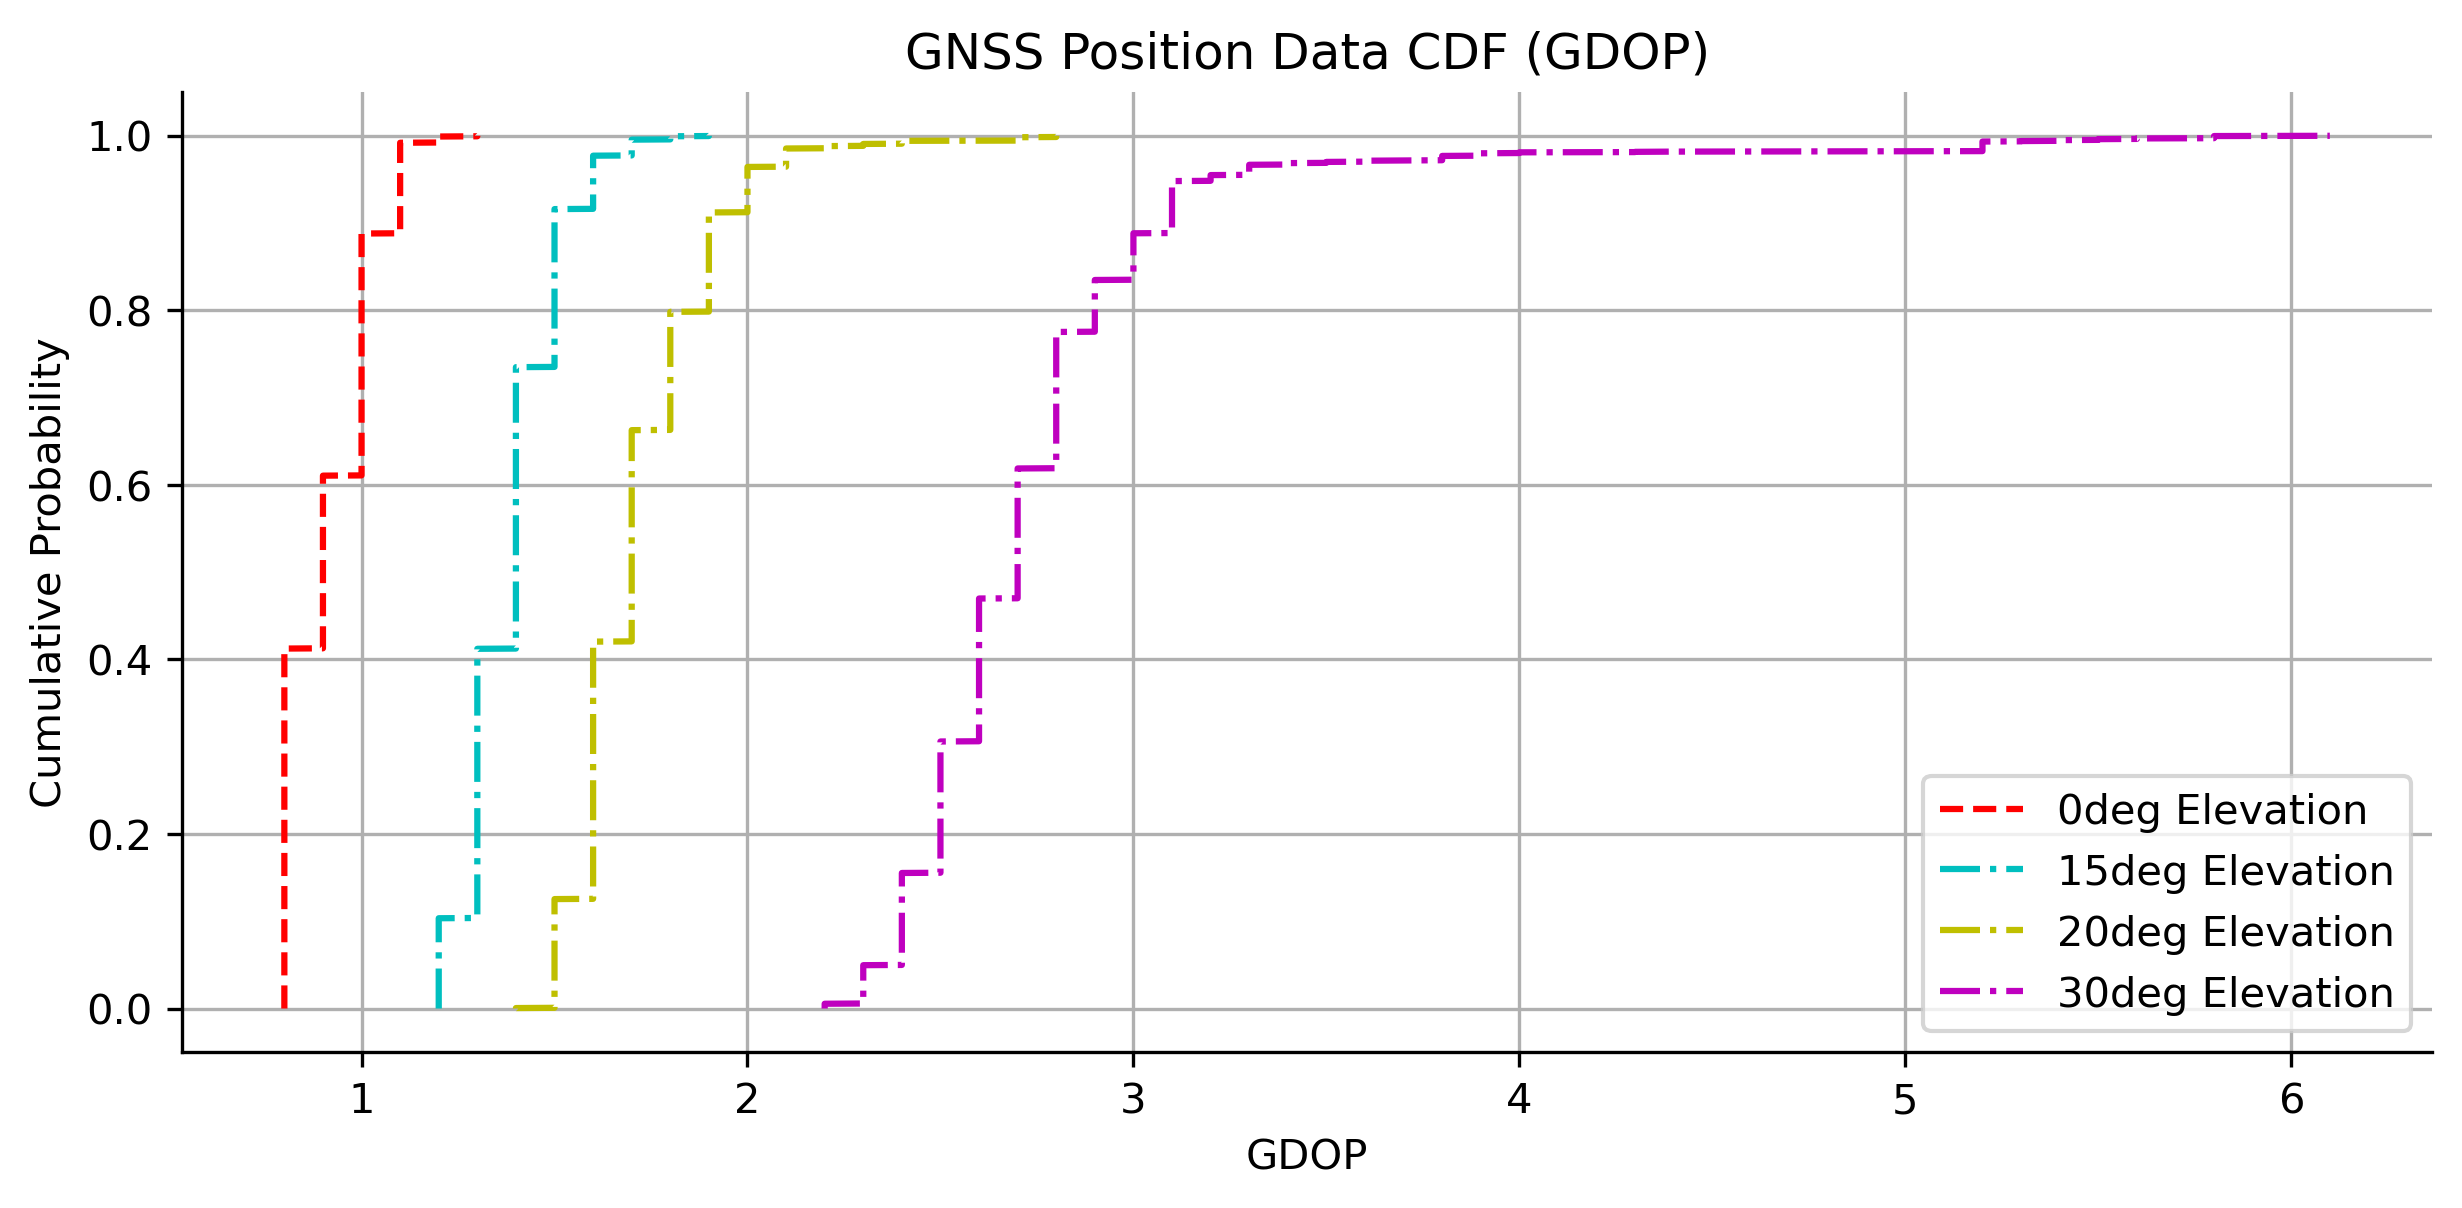

In [20]:
CDF_DOP0 = SatDopFile0['GDOP']
CDF_DOP15 = SatDopFile15['GDOP']
CDF_DOP20 = SatDopFile20['GDOP']
CDF_DOP30 = SatDopFile30['GDOP']
DOP = 'GDOP'

CDF_plot(CDF_DOP0, CDF_DOP15, CDF_DOP20, CDF_DOP30, DOP)

### Dillution of Precision

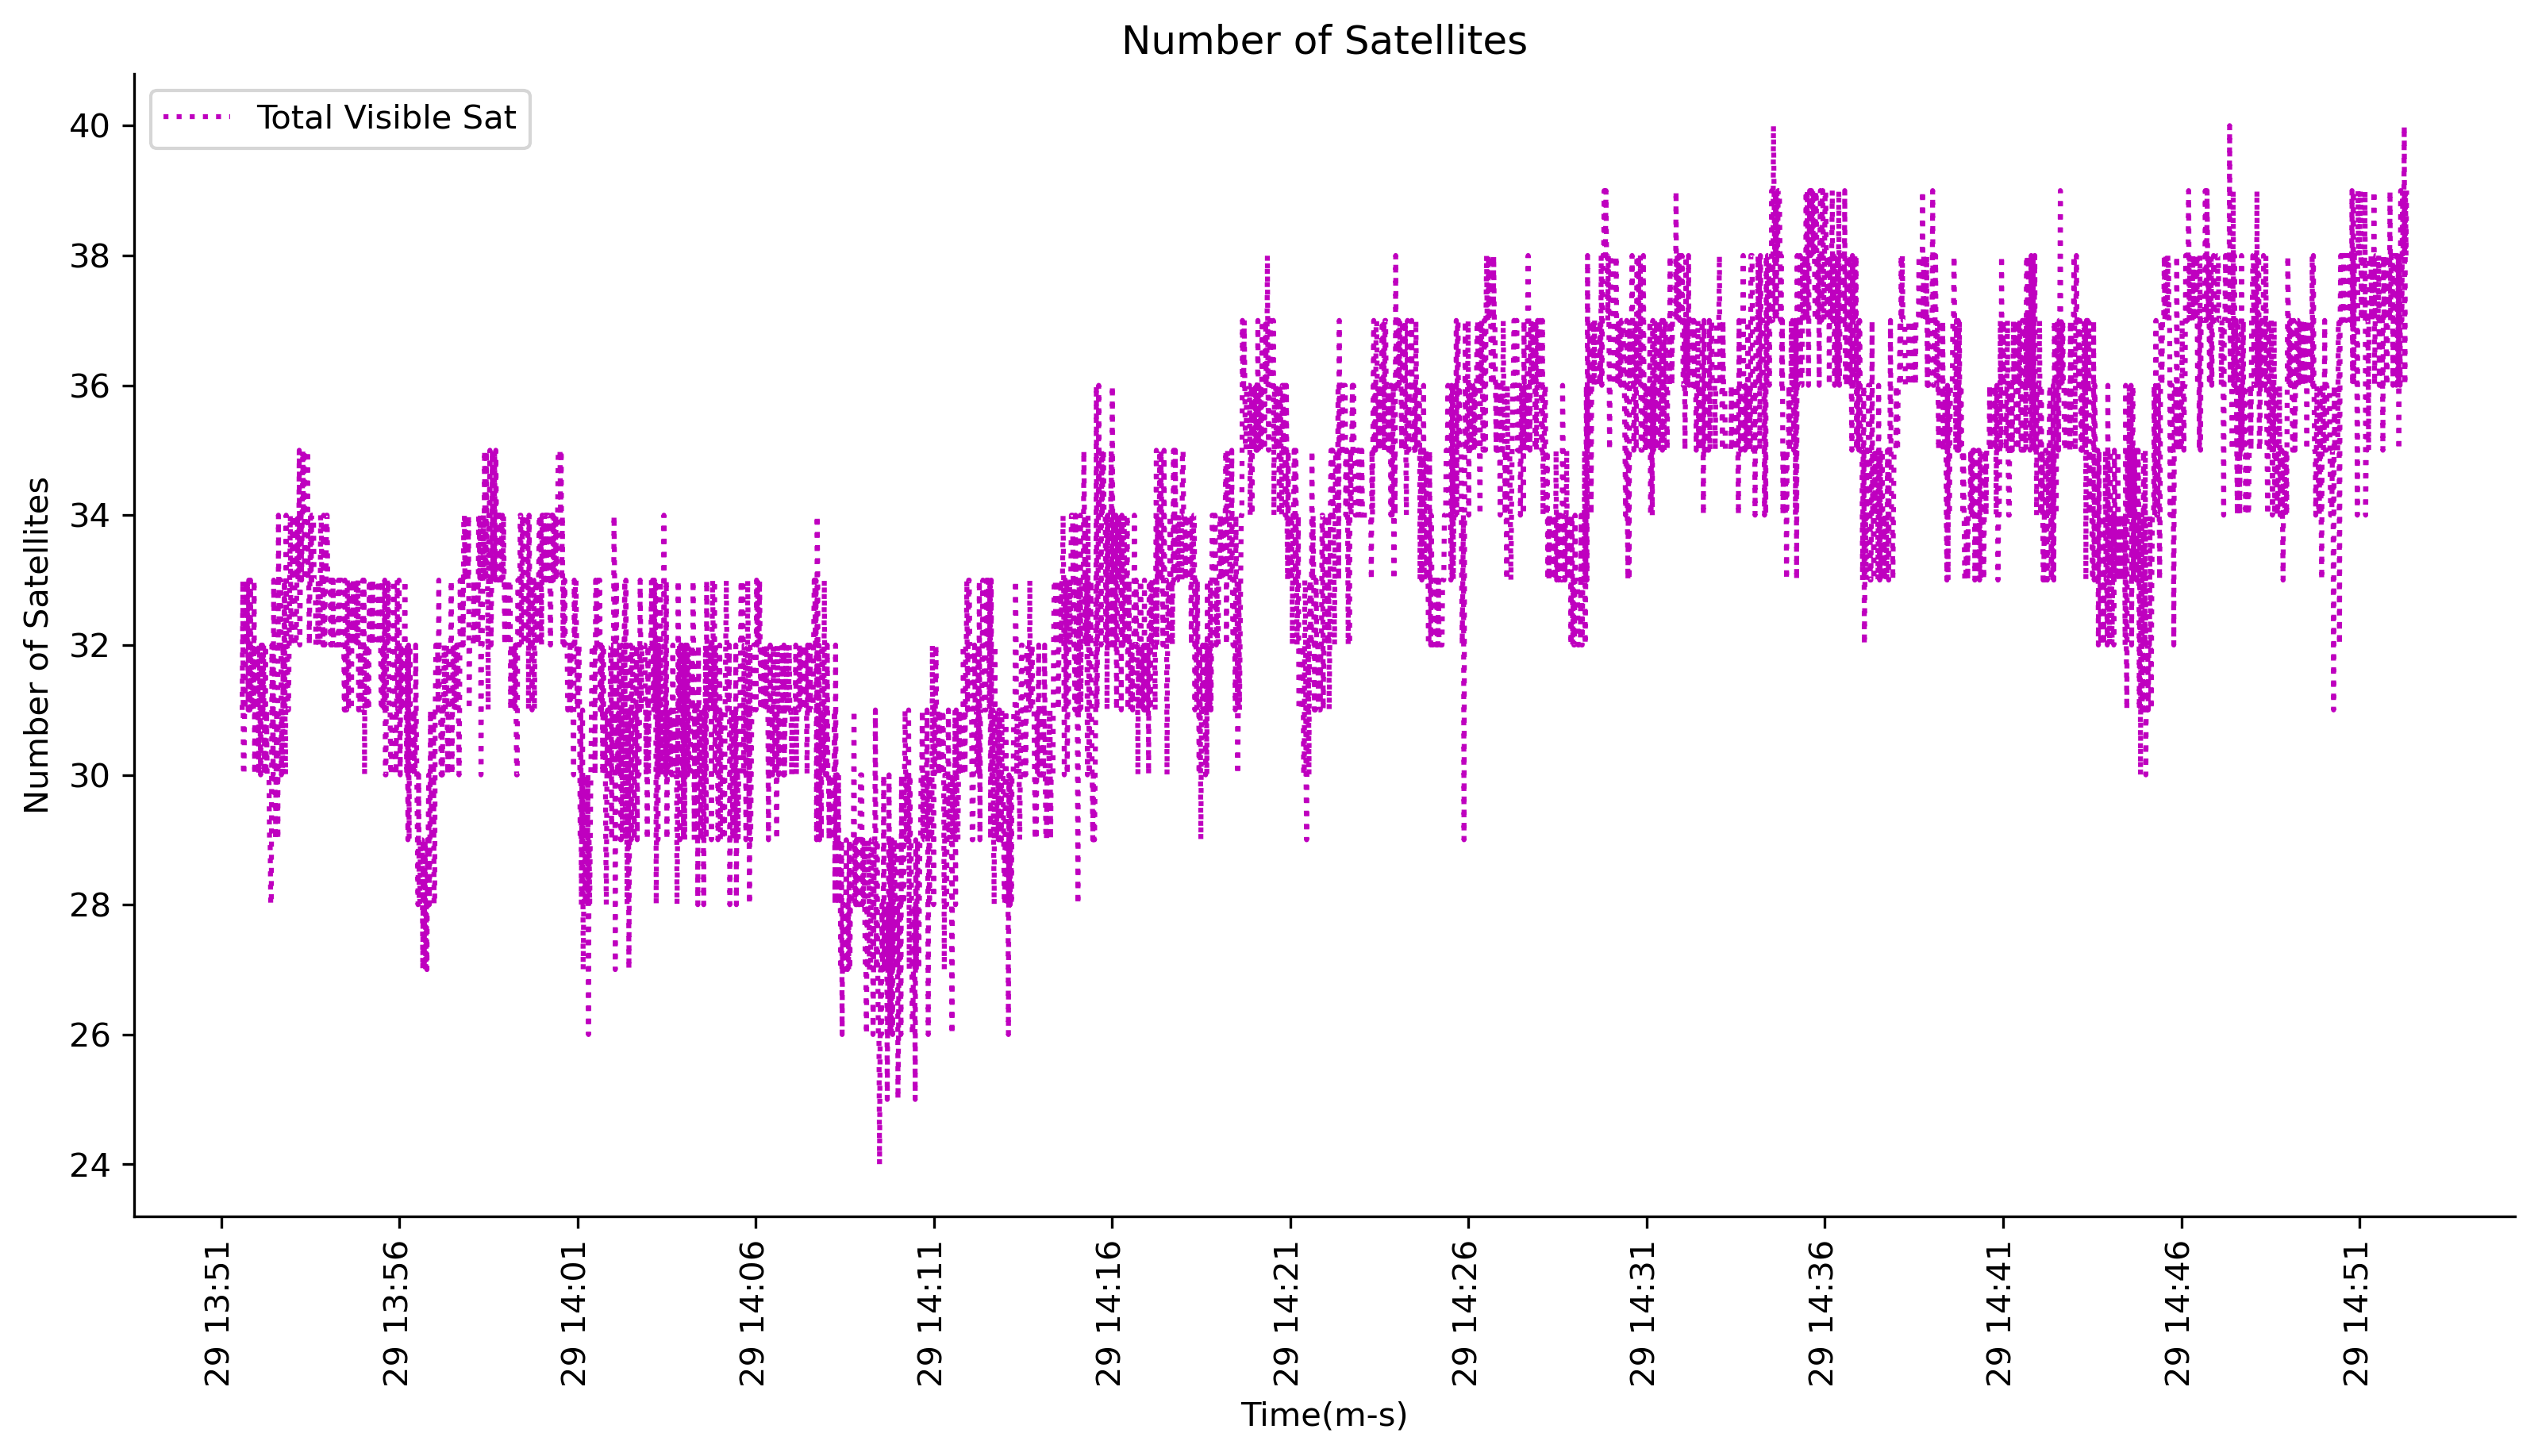

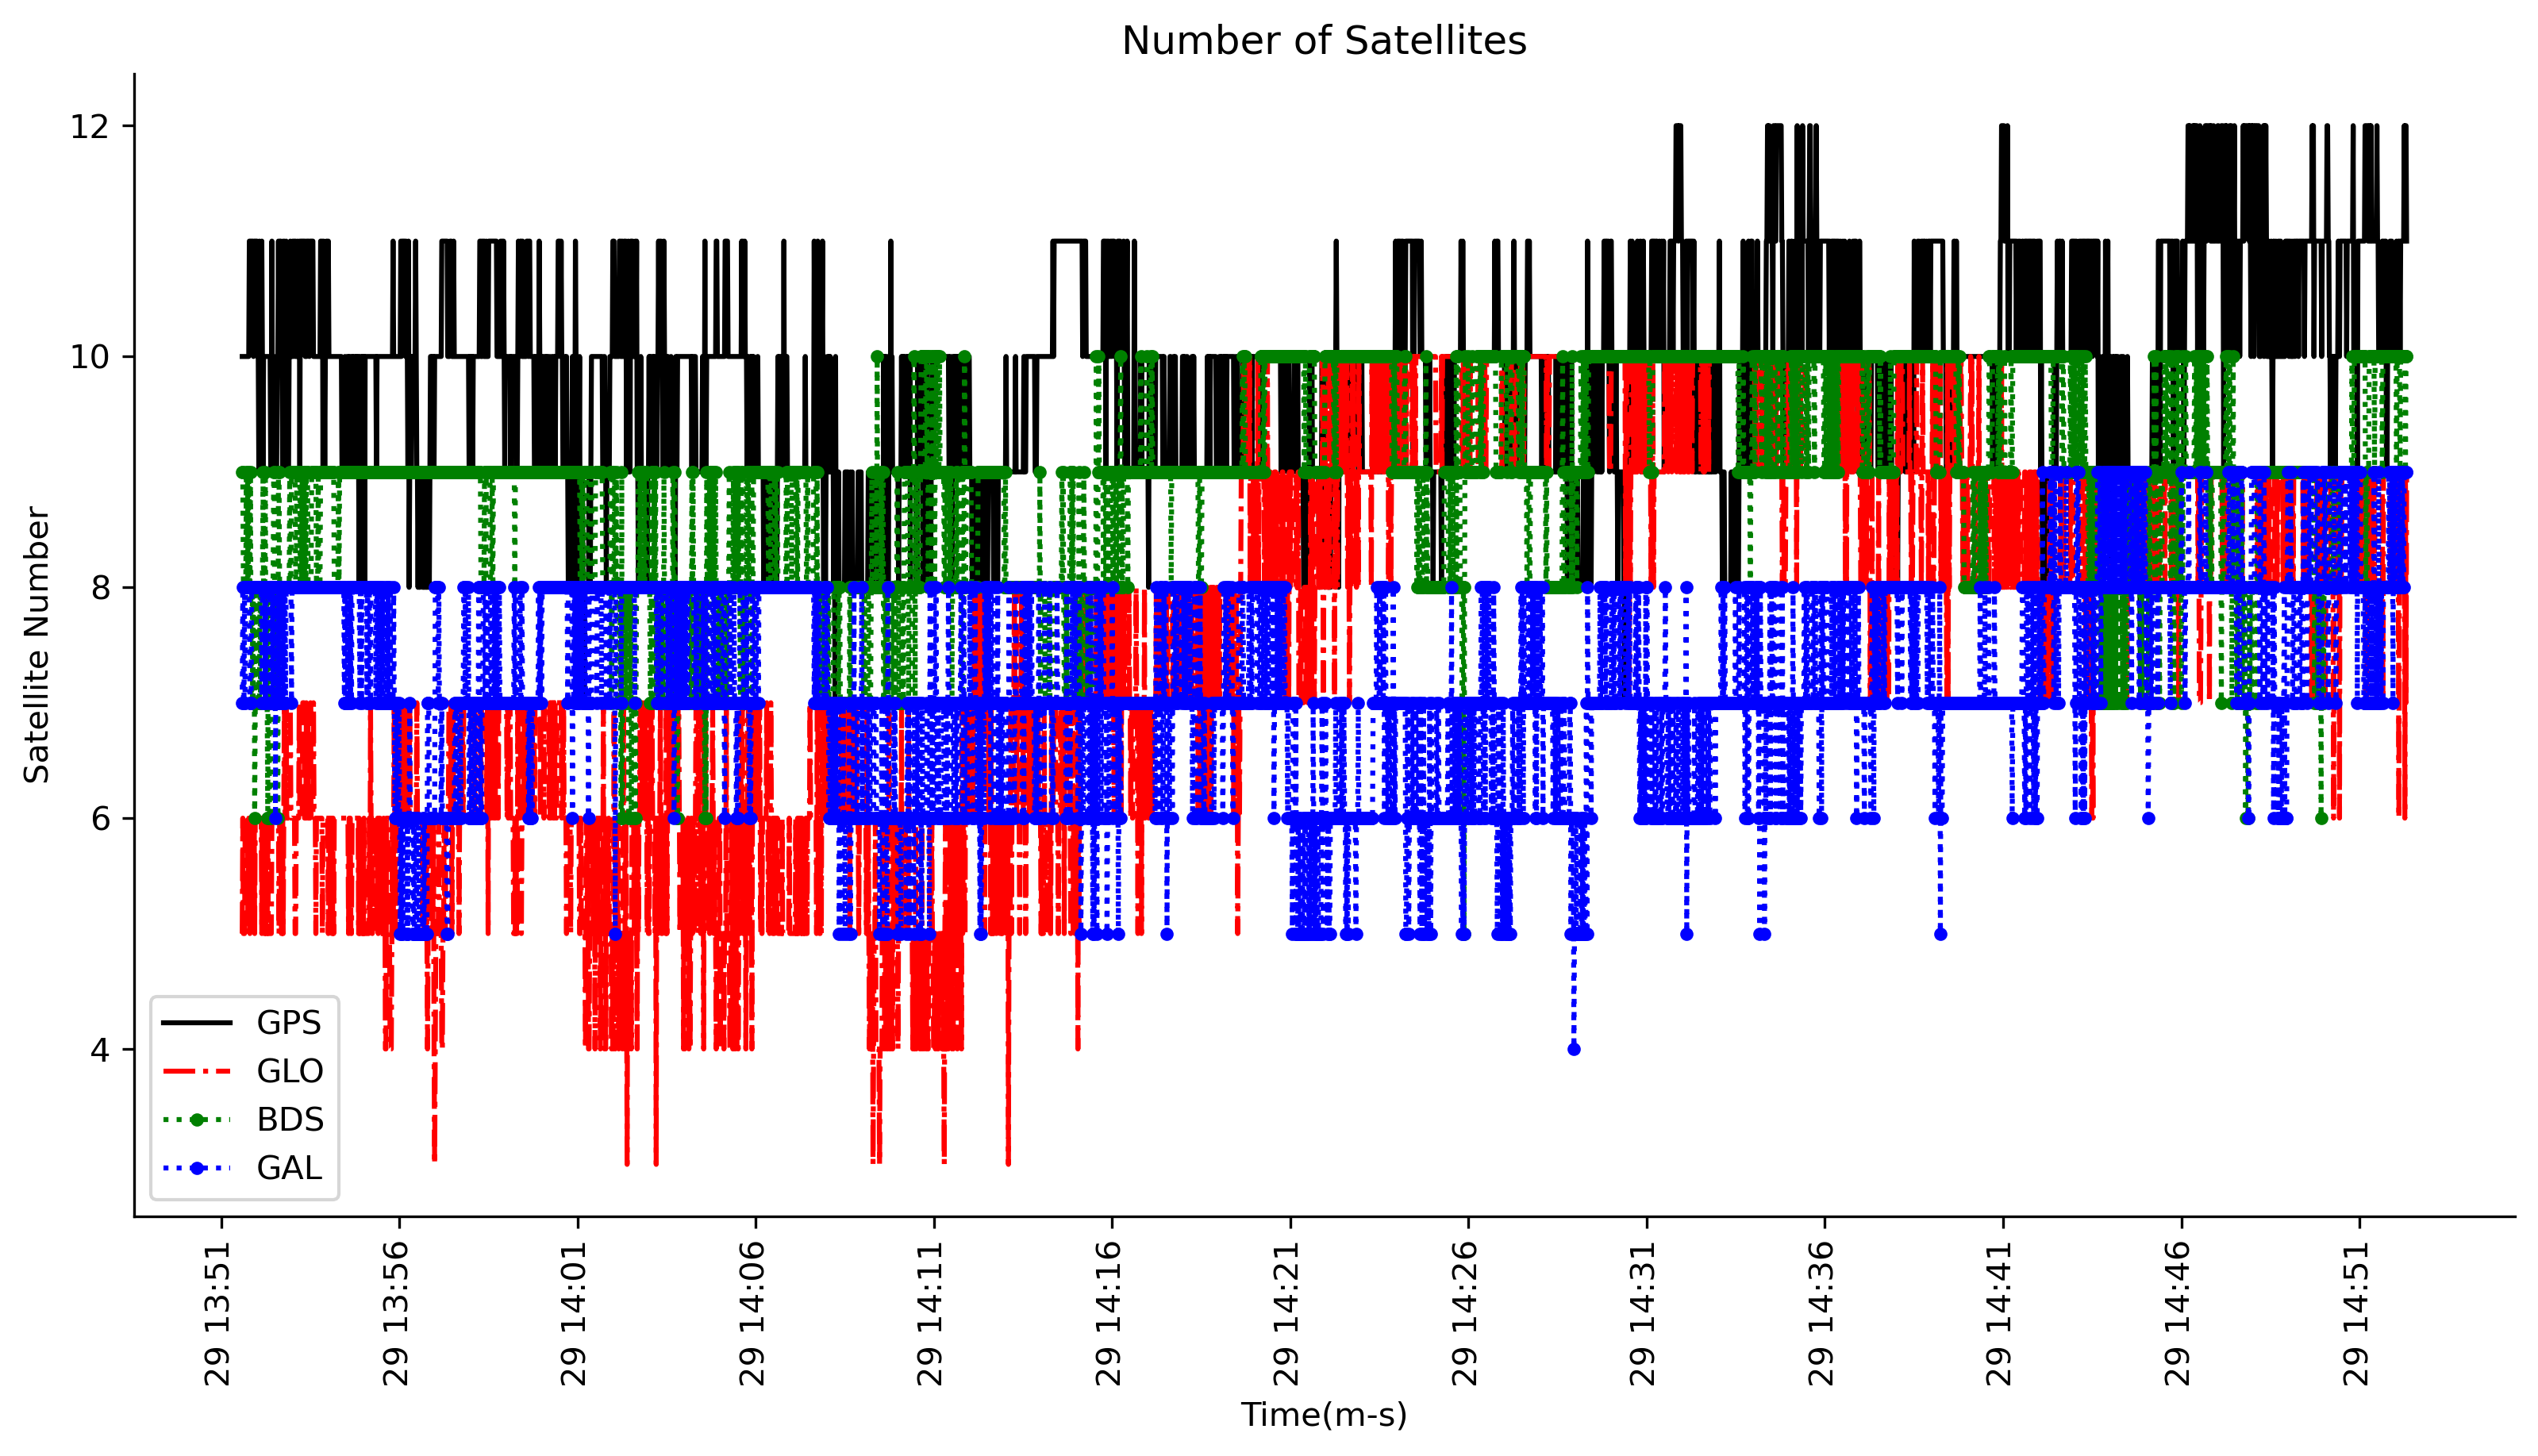

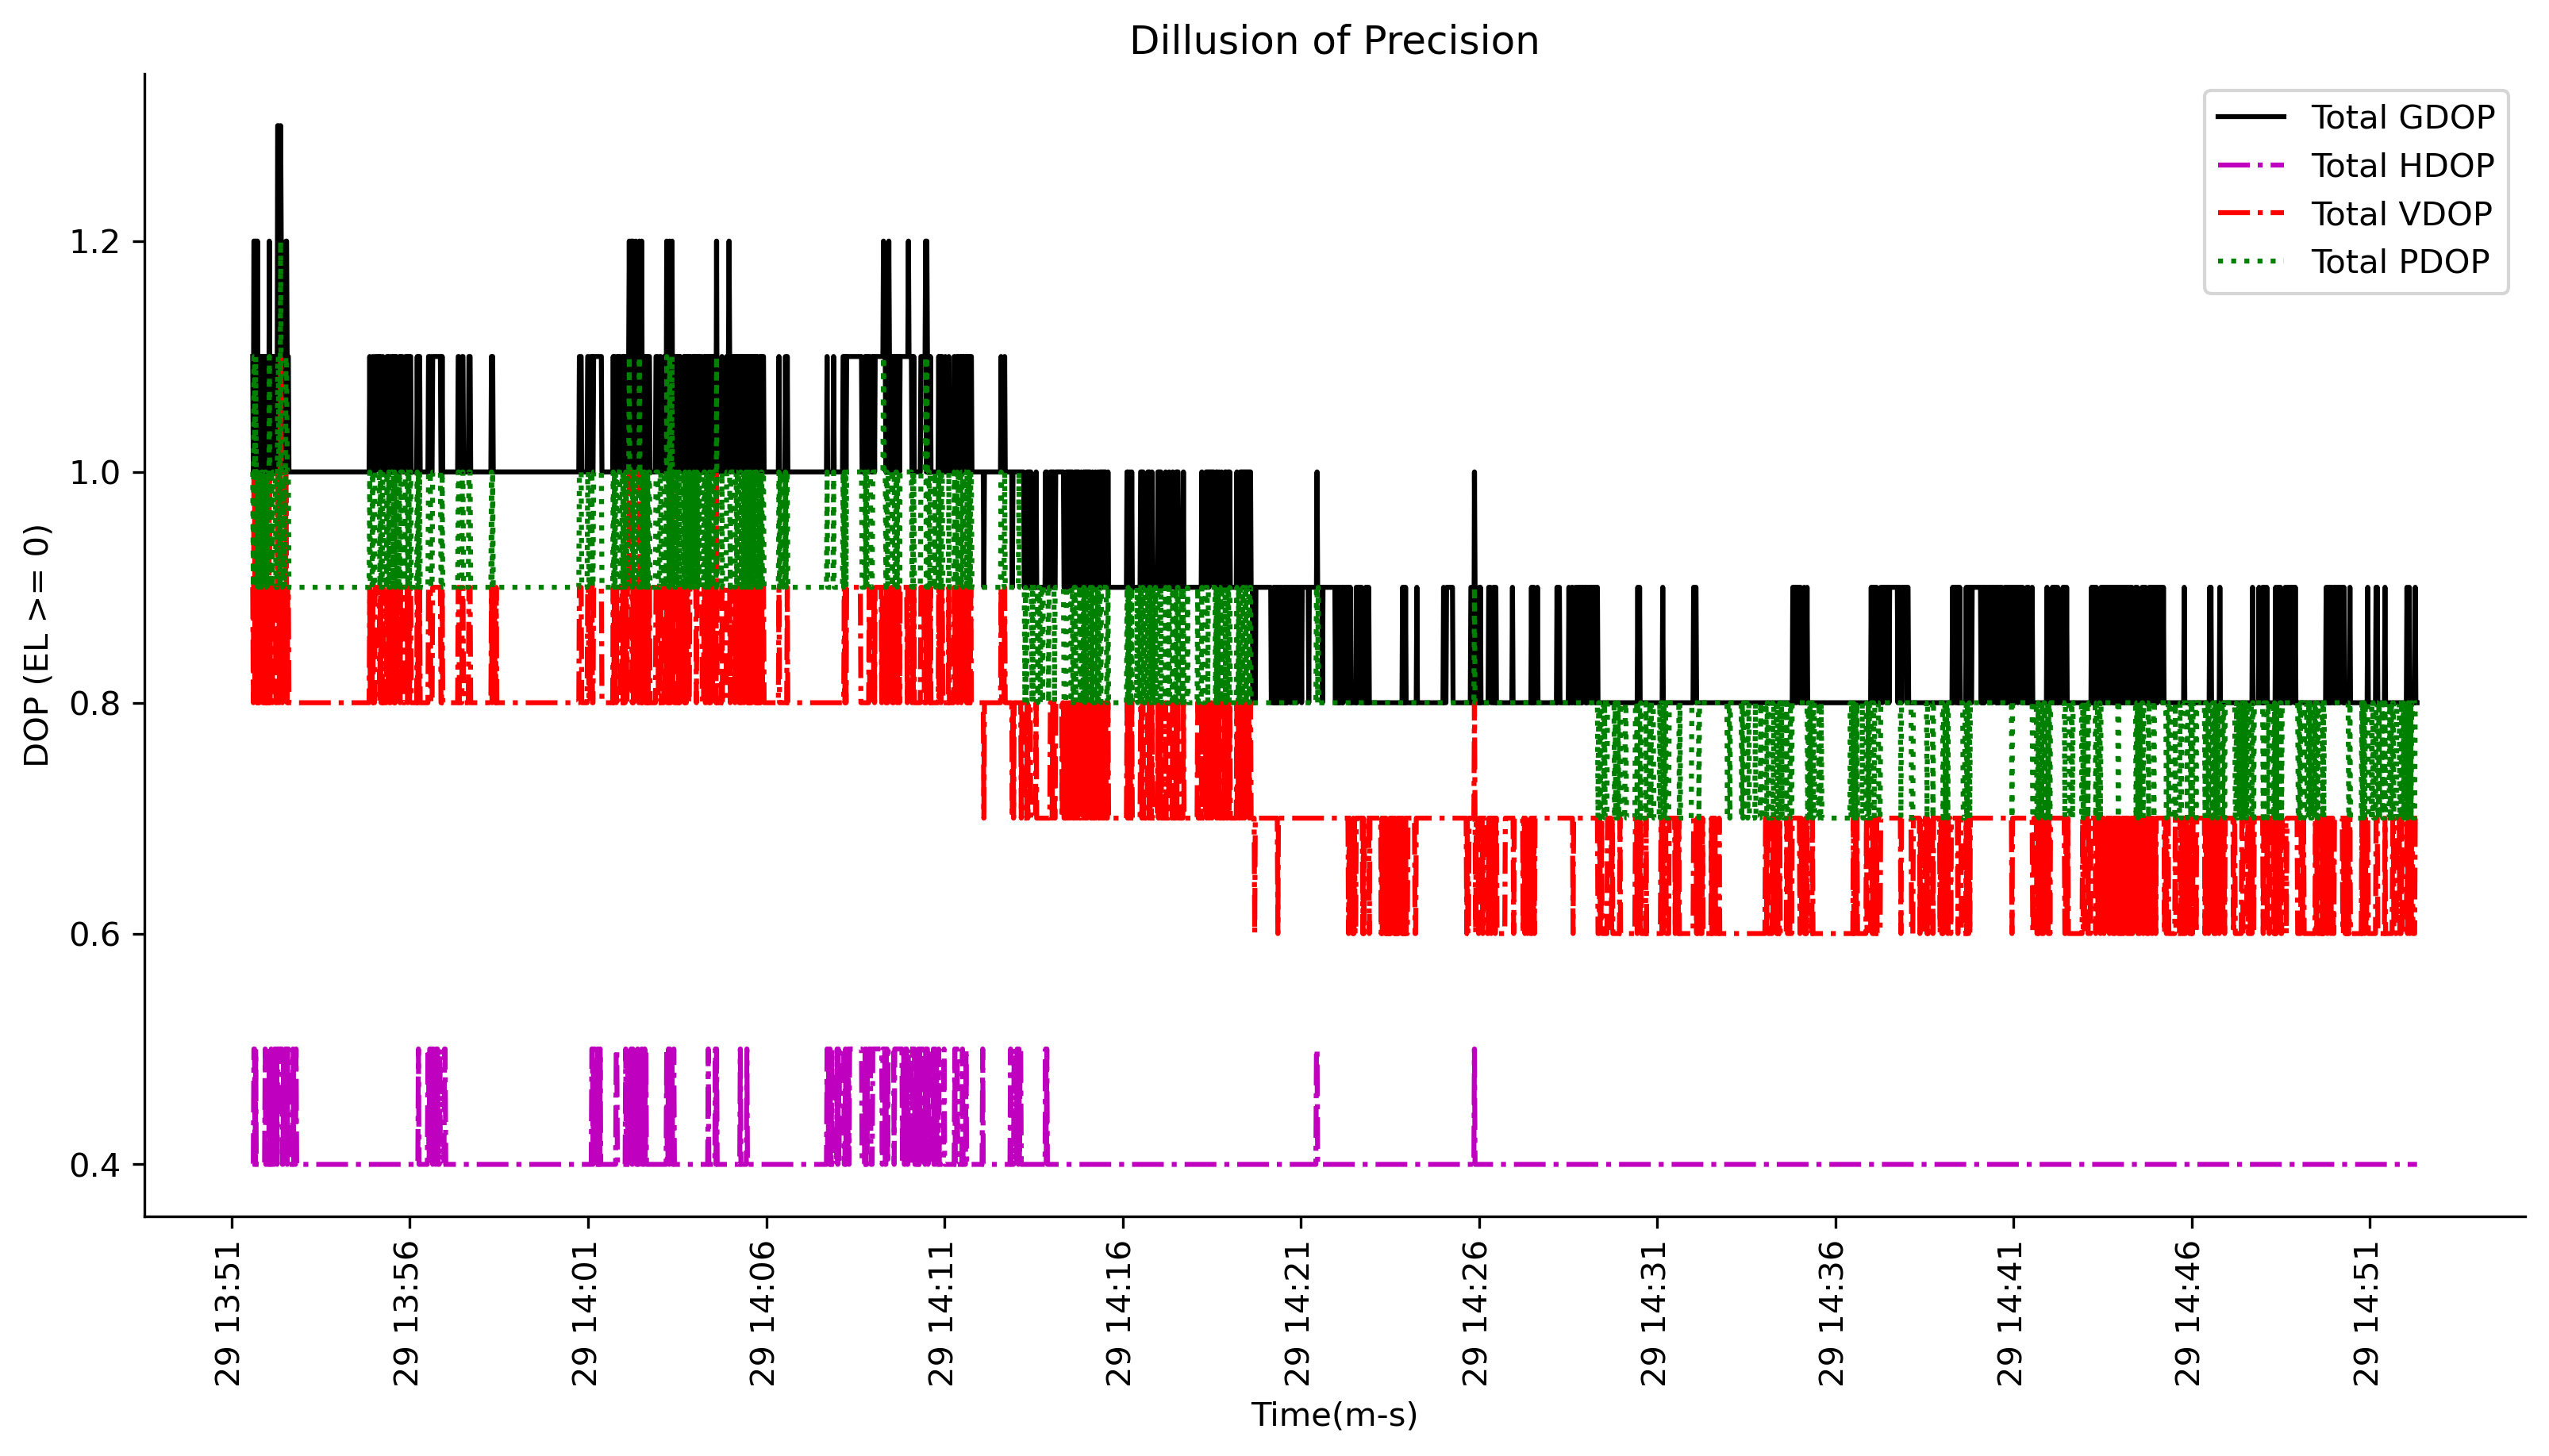

In [21]:
SatDOP(SatDopFile0, GpsSatDopFile0, GalSatDopFile0, GloSatDopFile0, BdsSatDopFile0)

### SNR

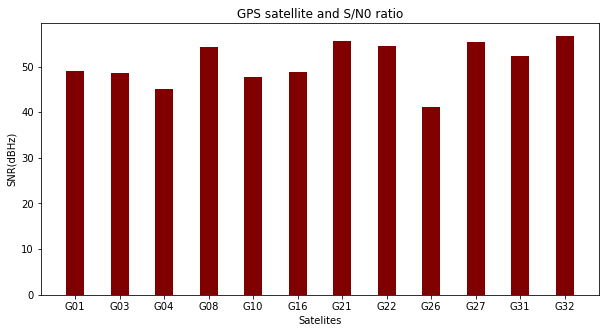

In [22]:
fig = plt.figure(figsize=(10, 5))
# bar plot
plt.bar(GpsRoverFile['SAT'], GpsRoverFile['SNR(dBHz)'], color = 'maroon', width= 0.4)
plt.xlabel('Satelites')
plt.ylabel('SNR(dBHz)')
plt.title('GPS satellite and S/N0 ratio')
plt.show()